In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import psycopg2
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")

# Establishing connection with postgres.


In [2]:
connection=psycopg2.connect(database="Kingdom", user="postgres", password="25657951")

# Creating and opening cursor


In [3]:
cursor=connection.cursor()

# Creating postgres Table

In [4]:
cursor.execute("drop table if exists specifications1")
cursor.execute("CREATE TABLE specifications1(Product_id integer,Price int,Sale int,weight float,resoloution float,ppi int,cpu_core int,cpu_freq float,internal_mem float,ram float,RearCam float,Front_Cam float,battery int,thickness float)")
print("Table Created")

Table Created


In [5]:
connection.commit()

# Query to copy csv to postgres table using COPY FROM command


In [6]:
query="COPY specifications1 FROM 'C:\\Users\\Public\\Cellphone.csv' DELIMITER','CSV HEADER;"
cursor.execute(query)

In [7]:
connection.commit()

# Using fetchall() to fetch the data. 

In [8]:
cursor.execute('select * from specifications1 LIMIT 10')
print(cursor.fetchall())
cursor.close
df=pd.read_sql('select * from specifications1',connection)

[(203, 2357, 10, 135.0, 5.2, 424, 8, 1.35, 16.0, 3.0, 13.0, 8.0, 2610, 7.4), (880, 1749, 10, 125.0, 4.0, 233, 2, 1.3, 4.0, 1.0, 3.15, 0.0, 1700, 9.9), (40, 1916, 10, 110.0, 4.7, 312, 4, 1.2, 8.0, 1.5, 13.0, 5.0, 2000, 7.6), (99, 1315, 11, 118.5, 4.0, 233, 2, 1.3, 4.0, 0.512, 3.15, 0.0, 1400, 11.0), (880, 1749, 11, 125.0, 4.0, 233, 2, 1.3, 4.0, 1.0, 3.15, 0.0, 1700, 9.9), (947, 2137, 12, 150.0, 5.5, 401, 4, 2.3, 16.0, 2.0, 16.0, 8.0, 2500, 9.5), (774, 1238, 13, 134.1, 4.0, 233, 2, 1.2, 8.0, 1.0, 2.0, 0.0, 1560, 11.7), (947, 2137, 13, 150.0, 5.5, 401, 4, 2.3, 16.0, 2.0, 16.0, 8.0, 2500, 9.5), (99, 1315, 14, 118.5, 4.0, 233, 2, 1.3, 4.0, 0.512, 3.15, 0.0, 1400, 11.0), (1103, 2580, 15, 145.0, 5.1, 432, 4, 2.5, 16.0, 2.0, 16.0, 2.0, 2800, 8.1)]


In [9]:
df.head(5)

,product_id,price,sale,weight,resoloution,ppi,cpu_core,cpu_freq,internal_mem,ram,rearcam,front_cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


# Checking the null values.

In [10]:
df.isnull().sum()

product_id      0
price           0
sale            0
weight          0
resoloution     0
ppi             0
cpu_core        0
cpu_freq        0
internal_mem    0
ram             0
rearcam         0
front_cam       0
battery         0
thickness       0
dtype: int64

In [11]:
df.columns

Index(['product_id', 'price', 'sale', 'weight', 'resoloution', 'ppi',
       'cpu_core', 'cpu_freq', 'internal_mem', 'ram', 'rearcam', 'front_cam',
       'battery', 'thickness'],
      dtype='object')

In [12]:
df.shape

(161, 14)

In [13]:
df.dtypes

product_id        int64
price             int64
sale              int64
weight          float64
resoloution     float64
ppi               int64
cpu_core          int64
cpu_freq        float64
internal_mem    float64
ram             float64
rearcam         float64
front_cam       float64
battery           int64
thickness       float64
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    161 non-null    int64  
 1   price         161 non-null    int64  
 2   sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu_core      161 non-null    int64  
 7   cpu_freq      161 non-null    float64
 8   internal_mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  rearcam       161 non-null    float64
 11  front_cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [15]:
df.describe()

,product_id,price,sale,weight,resoloution,ppi,cpu_core,cpu_freq,internal_mem,ram,rearcam,front_cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [16]:
df.isnull().sum()

product_id      0
price           0
sale            0
weight          0
resoloution     0
ppi             0
cpu_core        0
cpu_freq        0
internal_mem    0
ram             0
rearcam         0
front_cam       0
battery         0
thickness       0
dtype: int64

# Finding Correlation between all the columns in the dataset.

In [17]:
df.corr()


,product_id,price,sale,weight,resoloution,ppi,cpu_core,cpu_freq,internal_mem,ram,rearcam,front_cam,battery,thickness
product_id,1.000000,0.165136,0.218548,0.035869,-0.017817,0.207271,-0.008634,0.092428,0.261186,0.236194,0.172812,0.071020,0.031745,0.039807
price,0.165136,1.000000,0.273263,0.144555,0.404010,0.817614,0.686811,0.727383,0.776738,0.896915,0.739538,0.675286,0.559946,-0.716773
sale,0.218548,0.273263,1.000000,0.016114,0.017154,0.235896,0.069517,0.099133,0.489308,0.373127,0.292164,0.437233,0.120338,-0.047991
weight,0.035869,0.144555,0.016114,1.000000,0.890416,-0.054683,0.216257,0.222730,0.098849,0.149283,-0.029448,-0.005971,0.833783,-0.185262
resoloution,-0.017817,0.404010,0.017154,0.890416,1.000000,0.181292,0.472226,0.505454,0.202660,0.327216,0.249892,0.202720,0.843462,-0.533708
ppi,0.207271,0.817614,0.235896,-0.054683,0.181292,1.000000,0.487990,0.713168,0.618560,0.748724,0.774008,0.491371,0.302517,-0.496791
cpu_core,-0.008634,0.686811,0.069517,0.216257,0.472226,0.487990,1.000000,0.491519,0.276251,0.483128,0.611353,0.586698,0.459728,-0.697935
cpu_freq,0.092428,0.727383,0.099133,0.222730,0.505454,0.713168,0.491519,1.000000,0.441400,0.633547,0.625104,0.358319,0.473137,-0.614458
internal_mem,0.261186,0.776738,0.489308,0.098849,0.202660,0.618560,0.276251,0.441400,1.000000,0.875354,0.451917,0.555733,0.461506,-0.367412
ram,0.236194,0.896915,0.373127,0.149283,0.327216,0.748724,0.483128,0.633547,0.875354,1.000000,0.648073,0.647470,0.541001,-0.521074


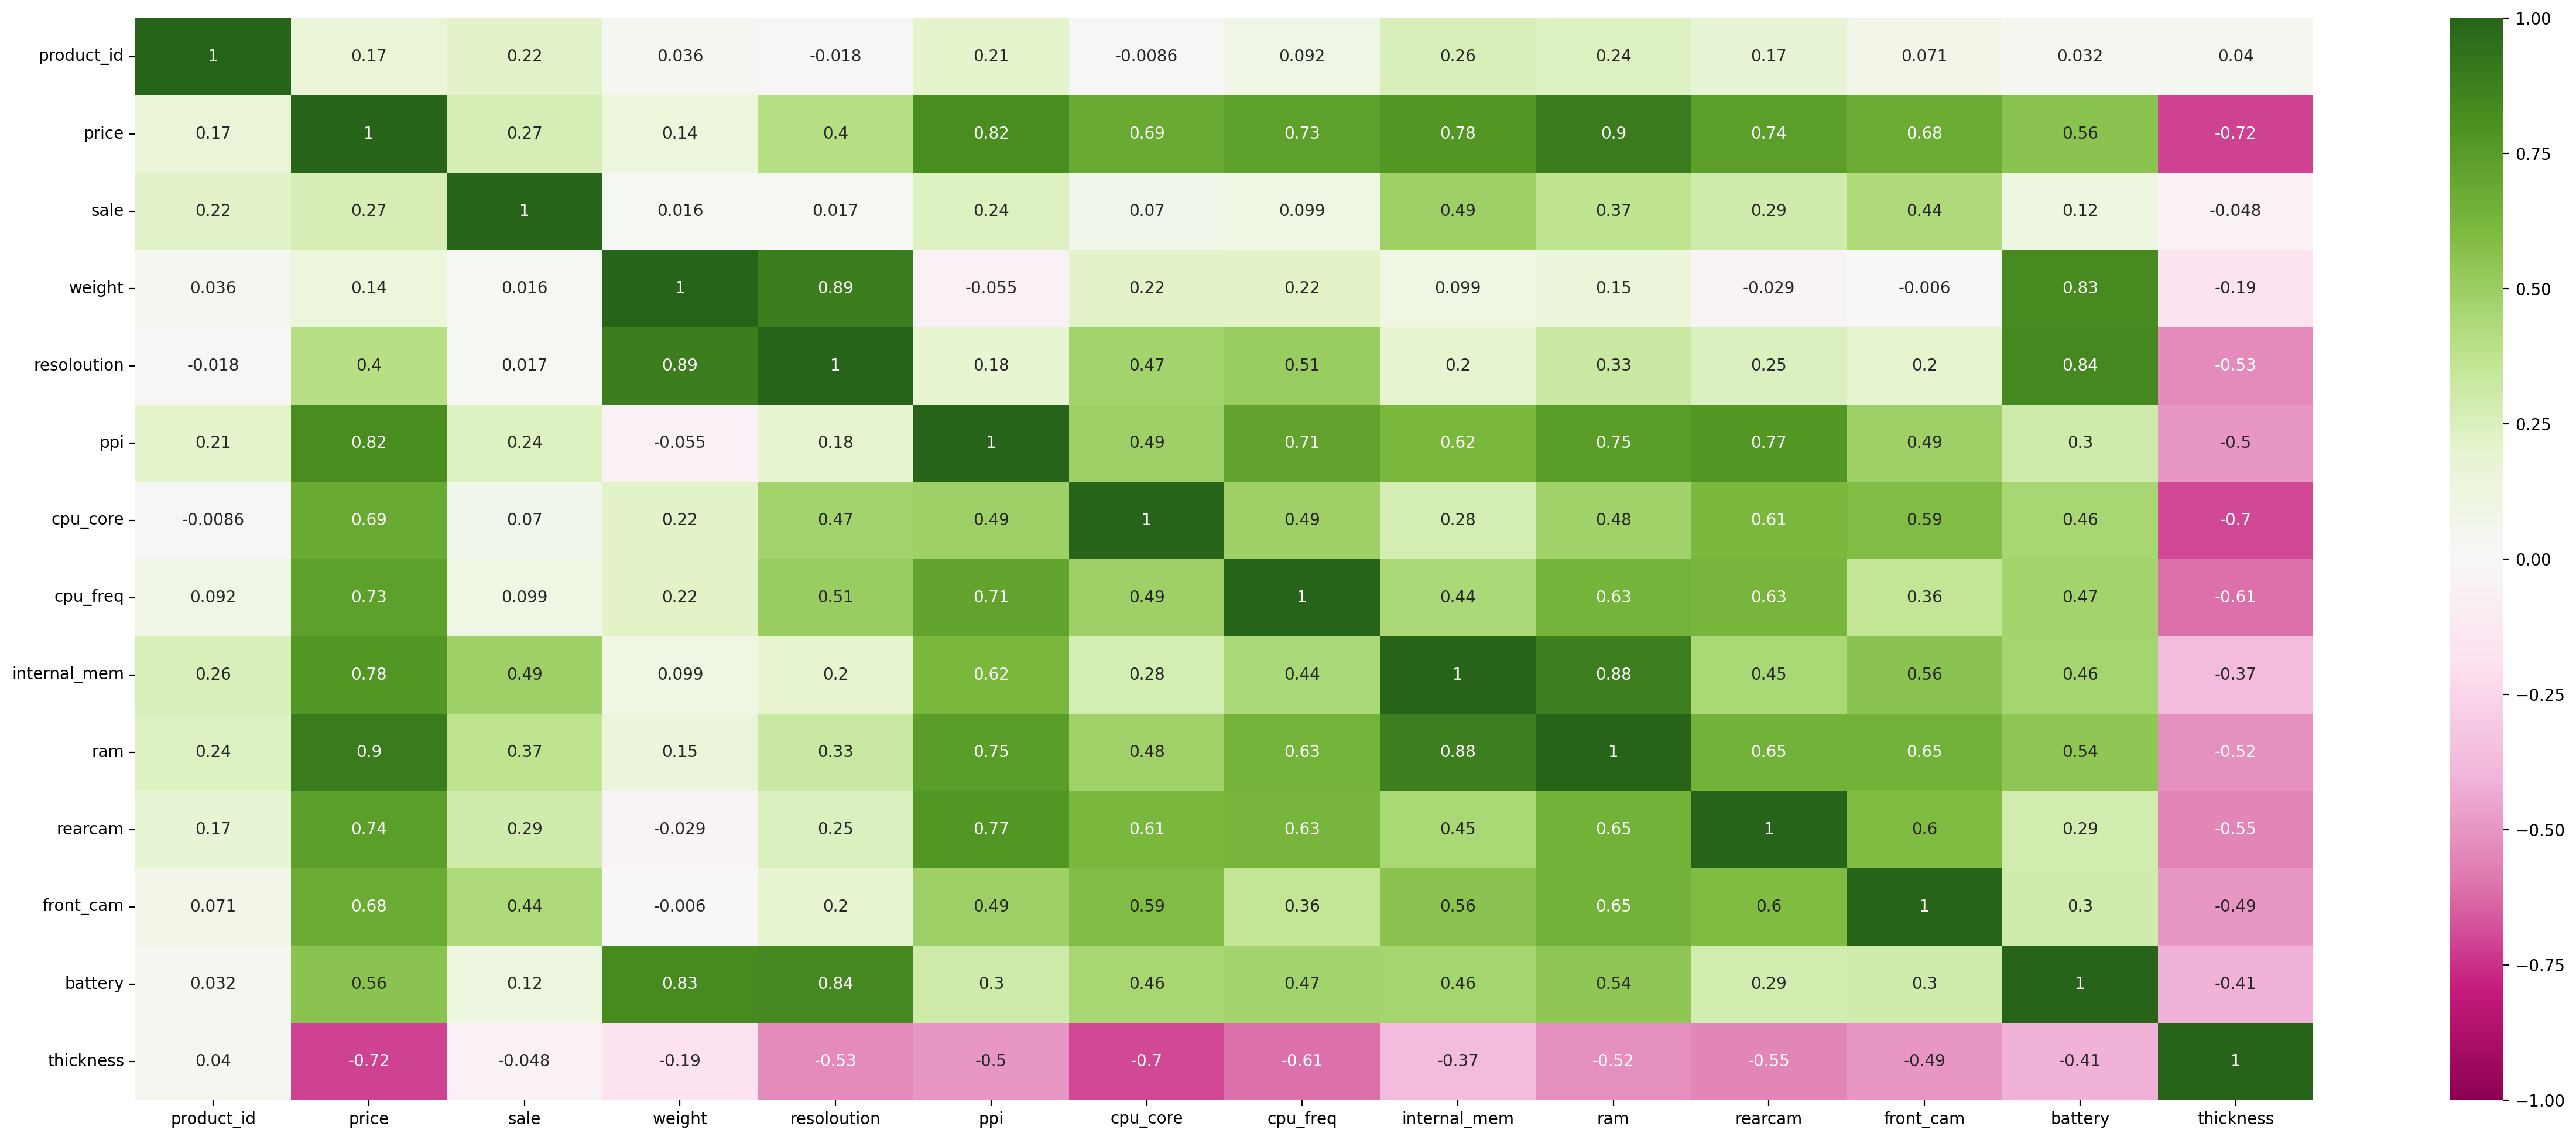

In [18]:
# Correlation between the independent and dependent variables
plt.figure(figsize = (30,12), dpi = 200)
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = +1, cmap = "PiYG")
plt.show()

In [19]:
df=df.drop('product_id',axis=1)

In [20]:
df

,price,sale,weight,resoloution,ppi,cpu_core,cpu_freq,internal_mem,ram,rearcam,front_cam,battery,thickness
0,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


# Graphs showing the distribution and boxplot for all the columns.

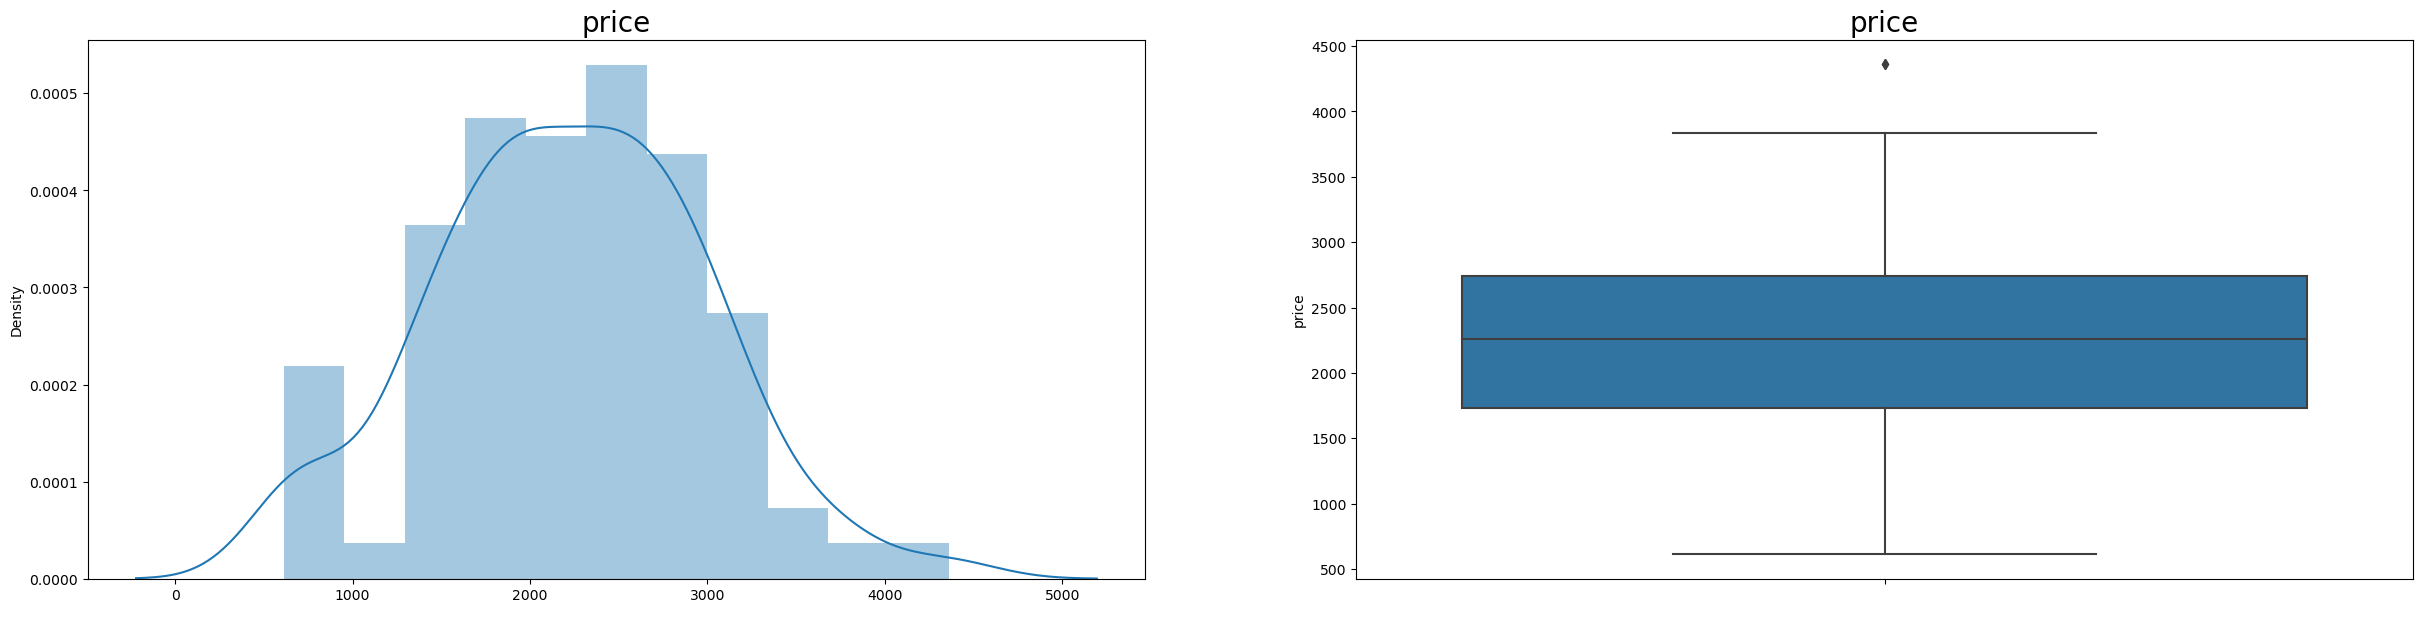

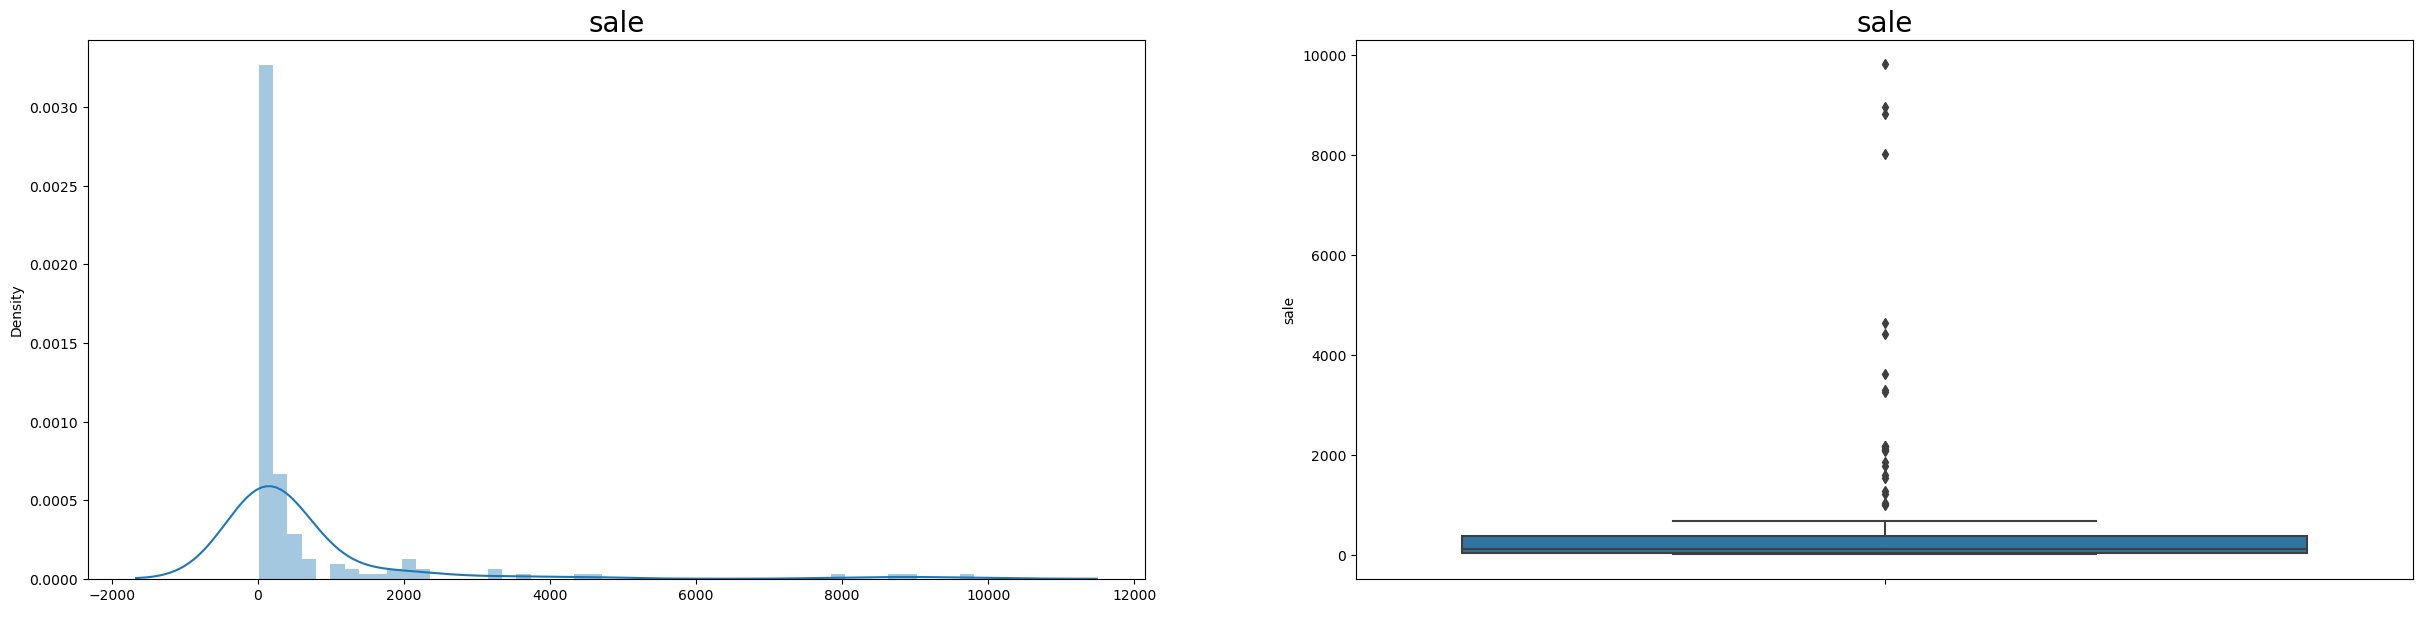

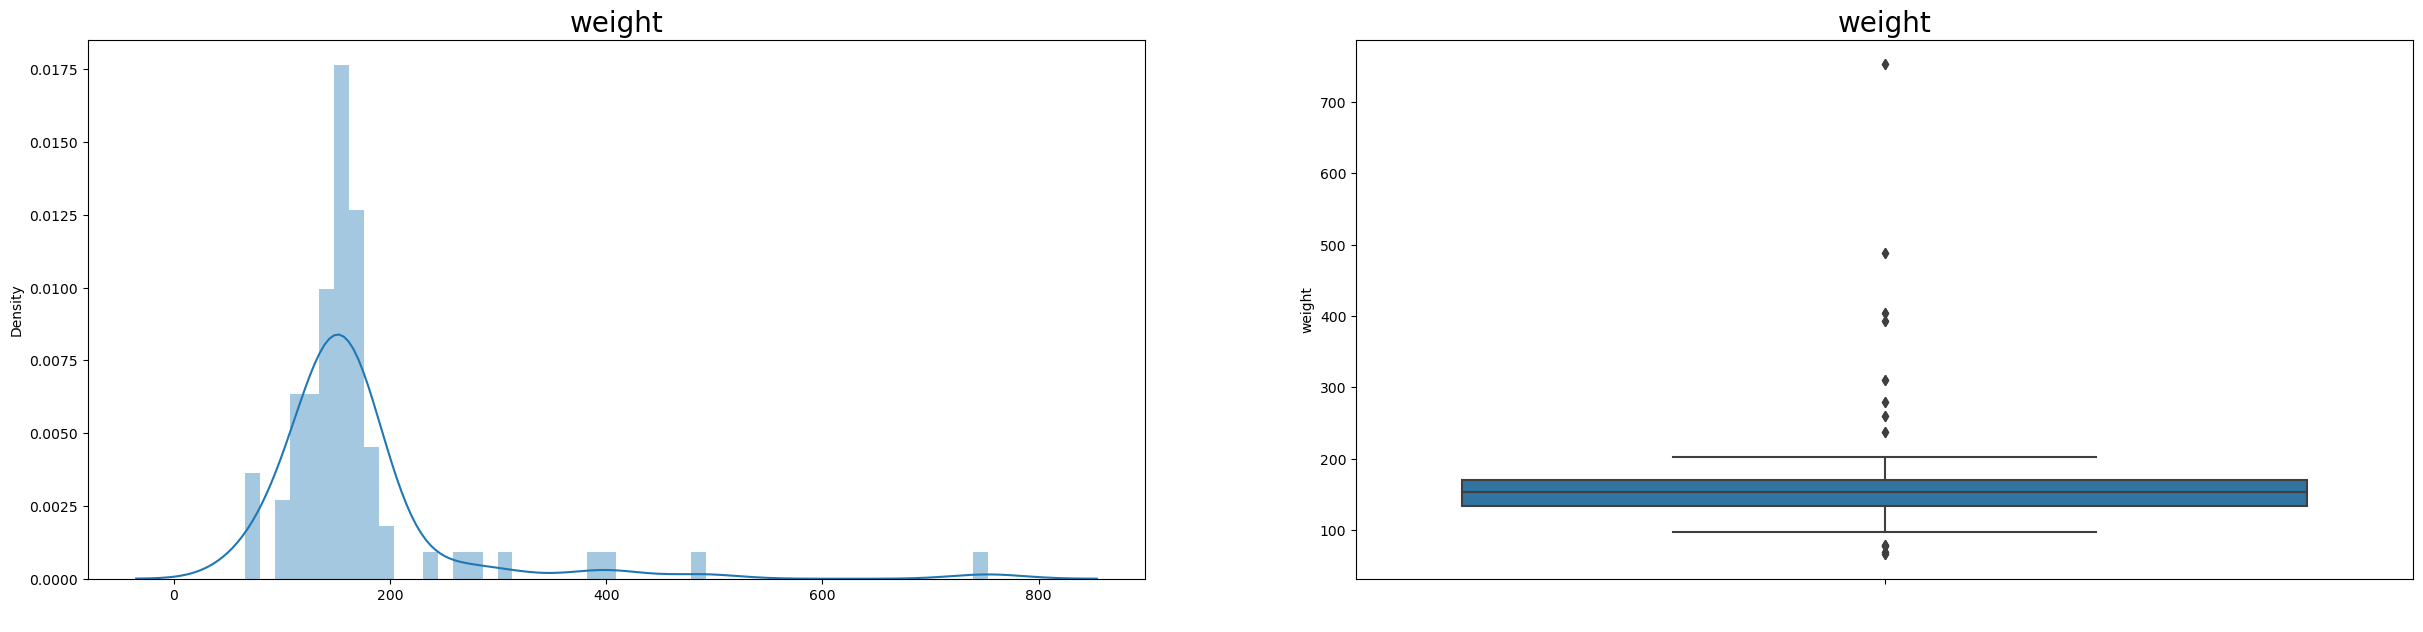

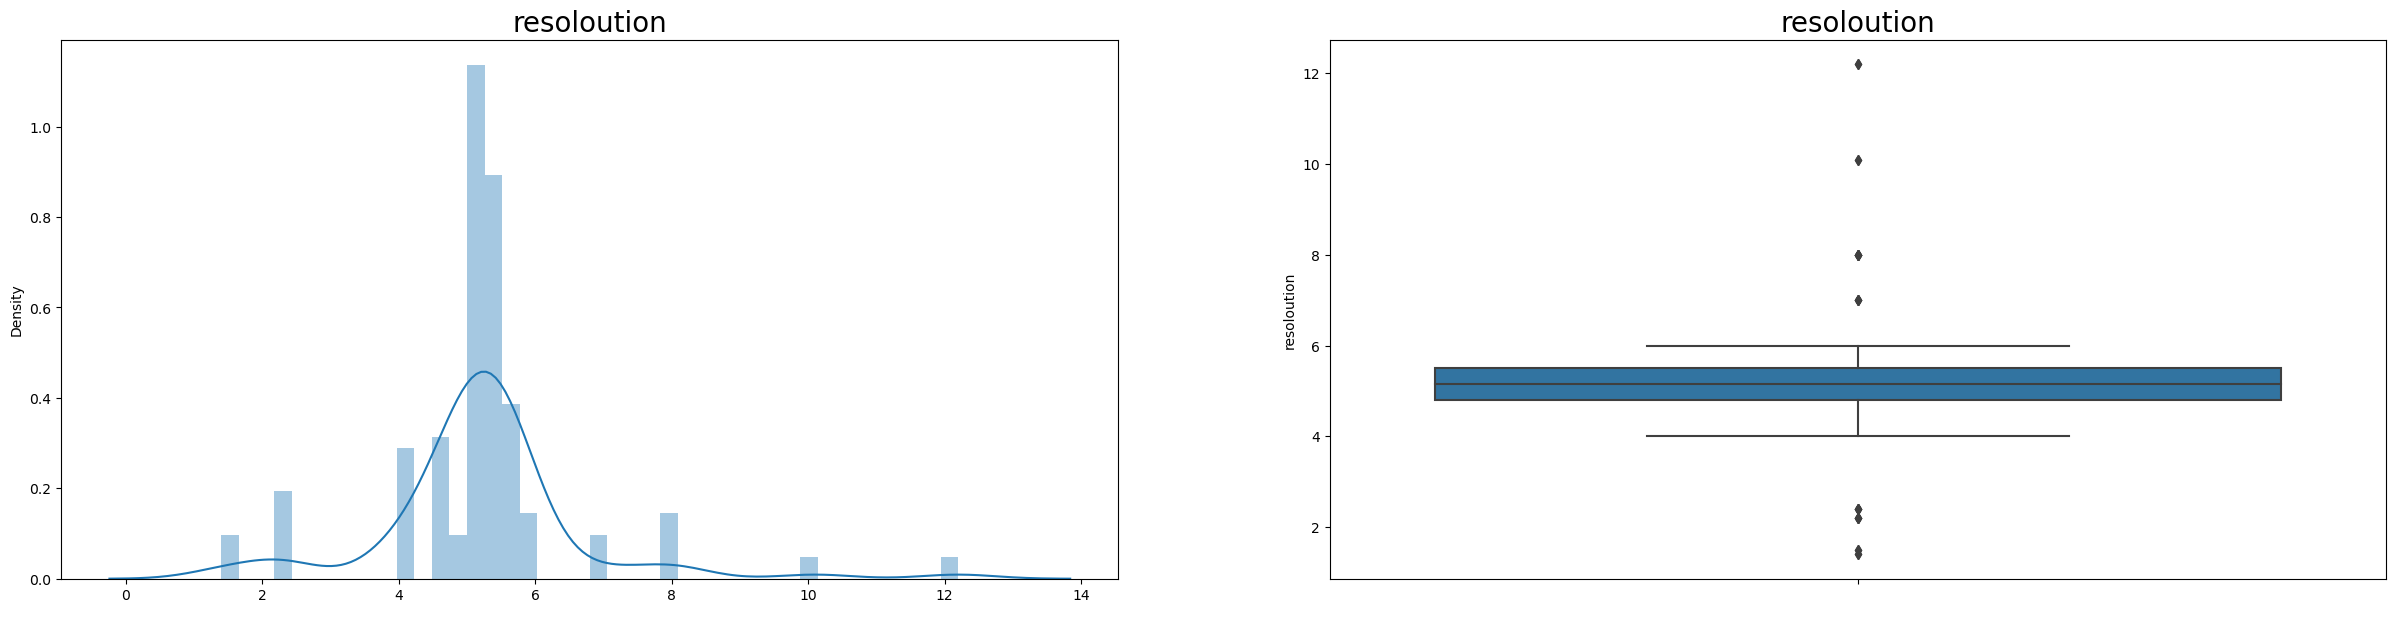

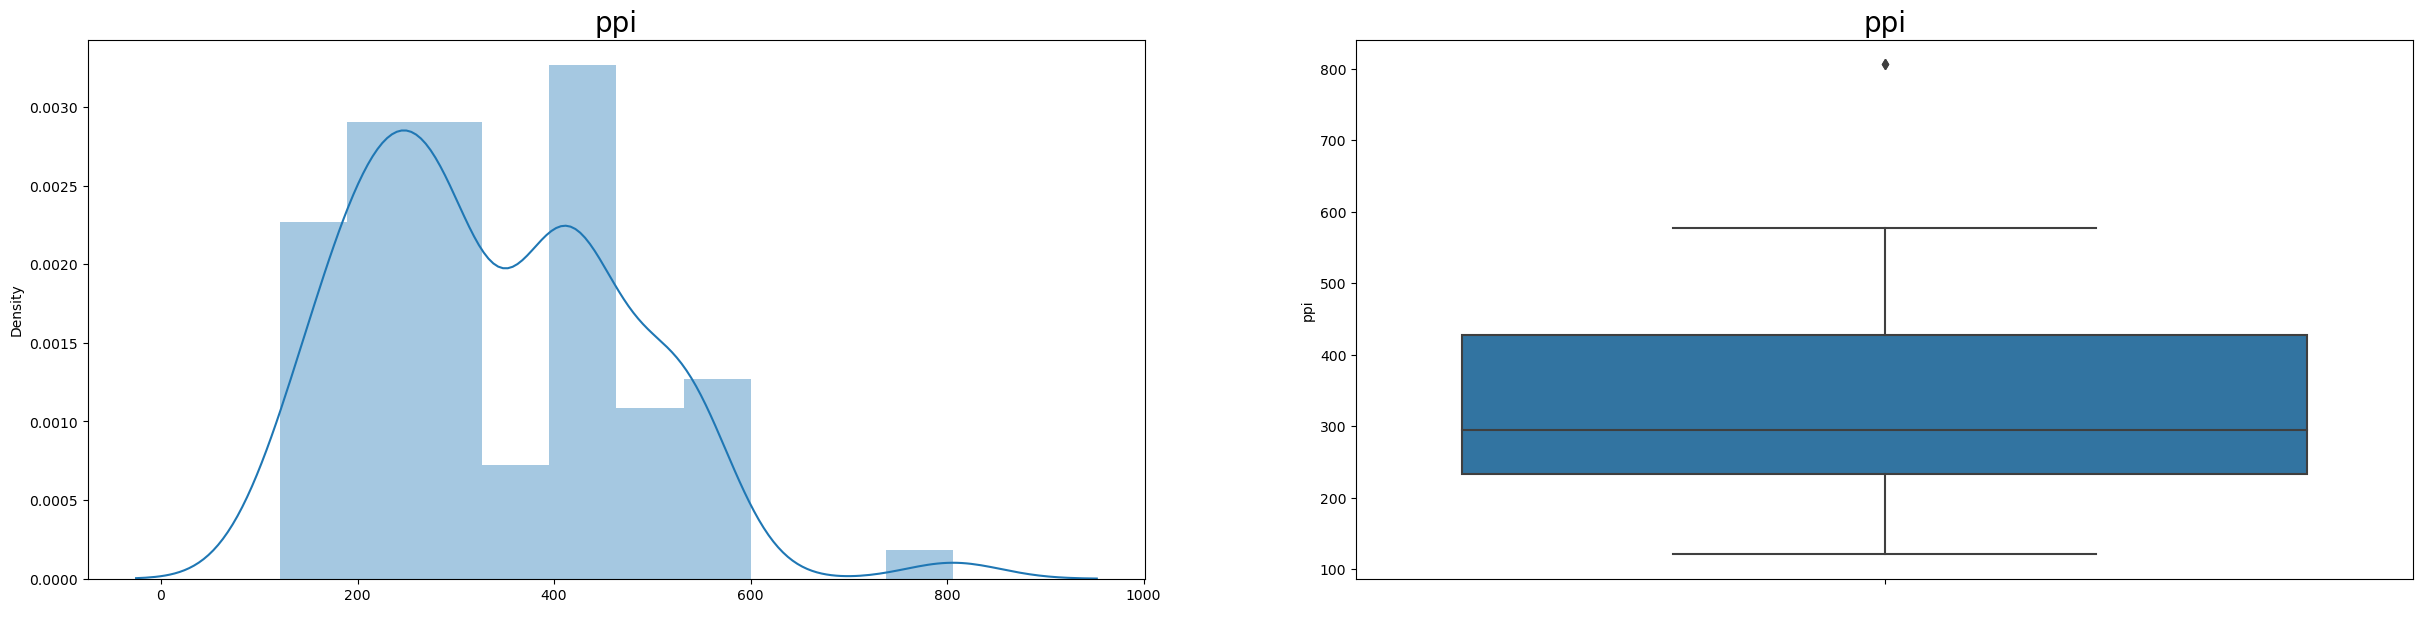

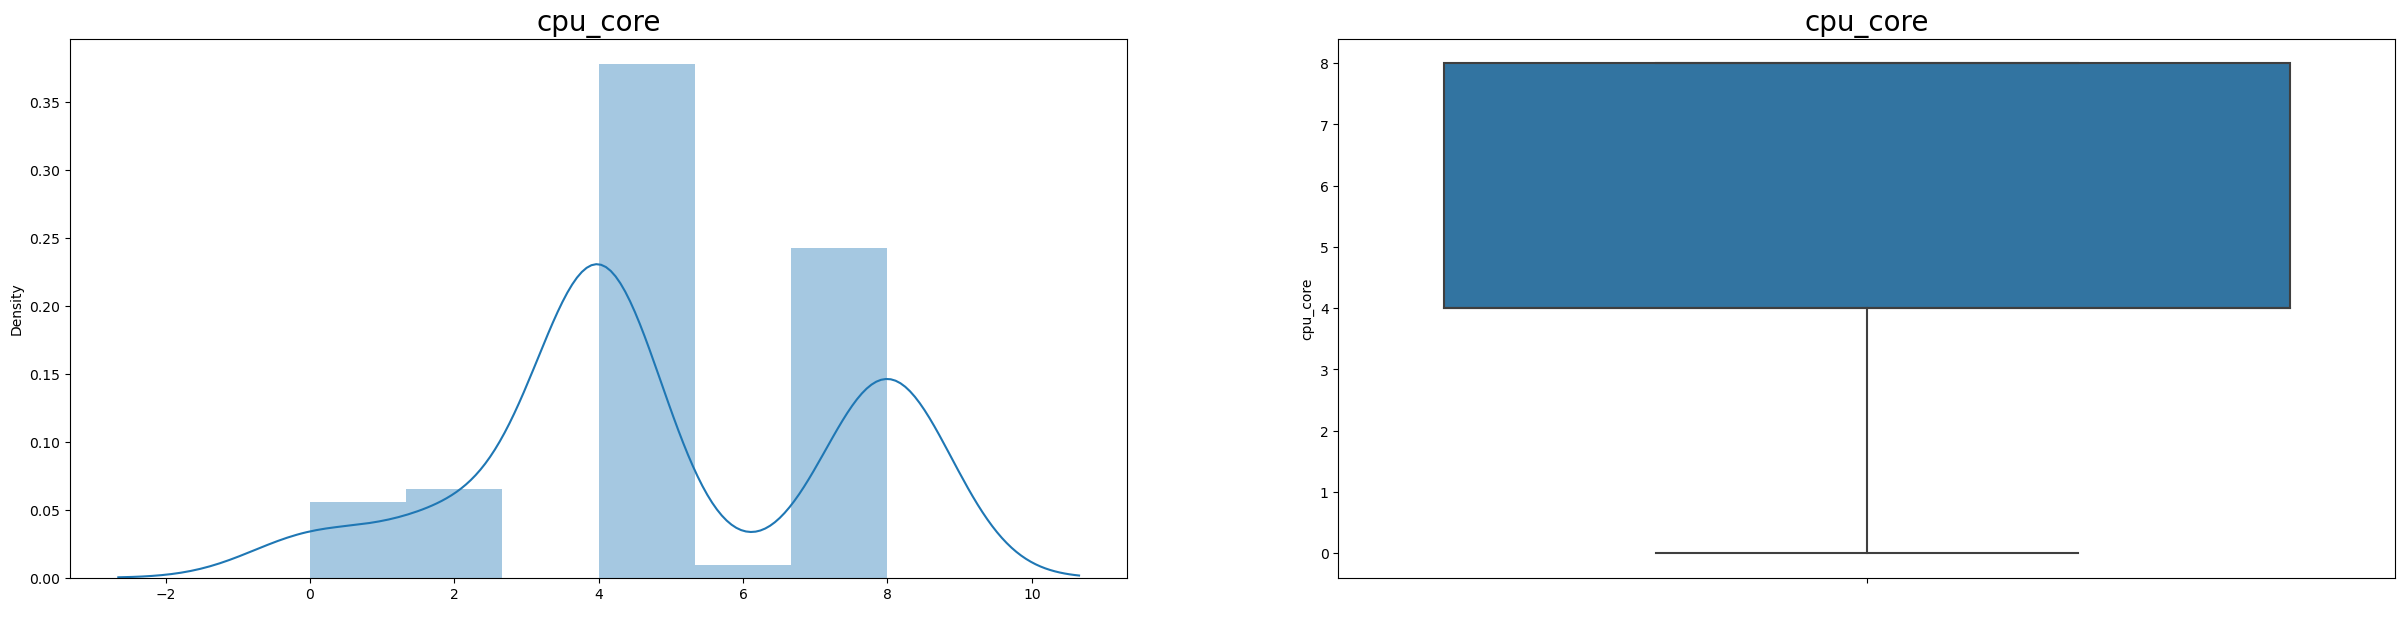

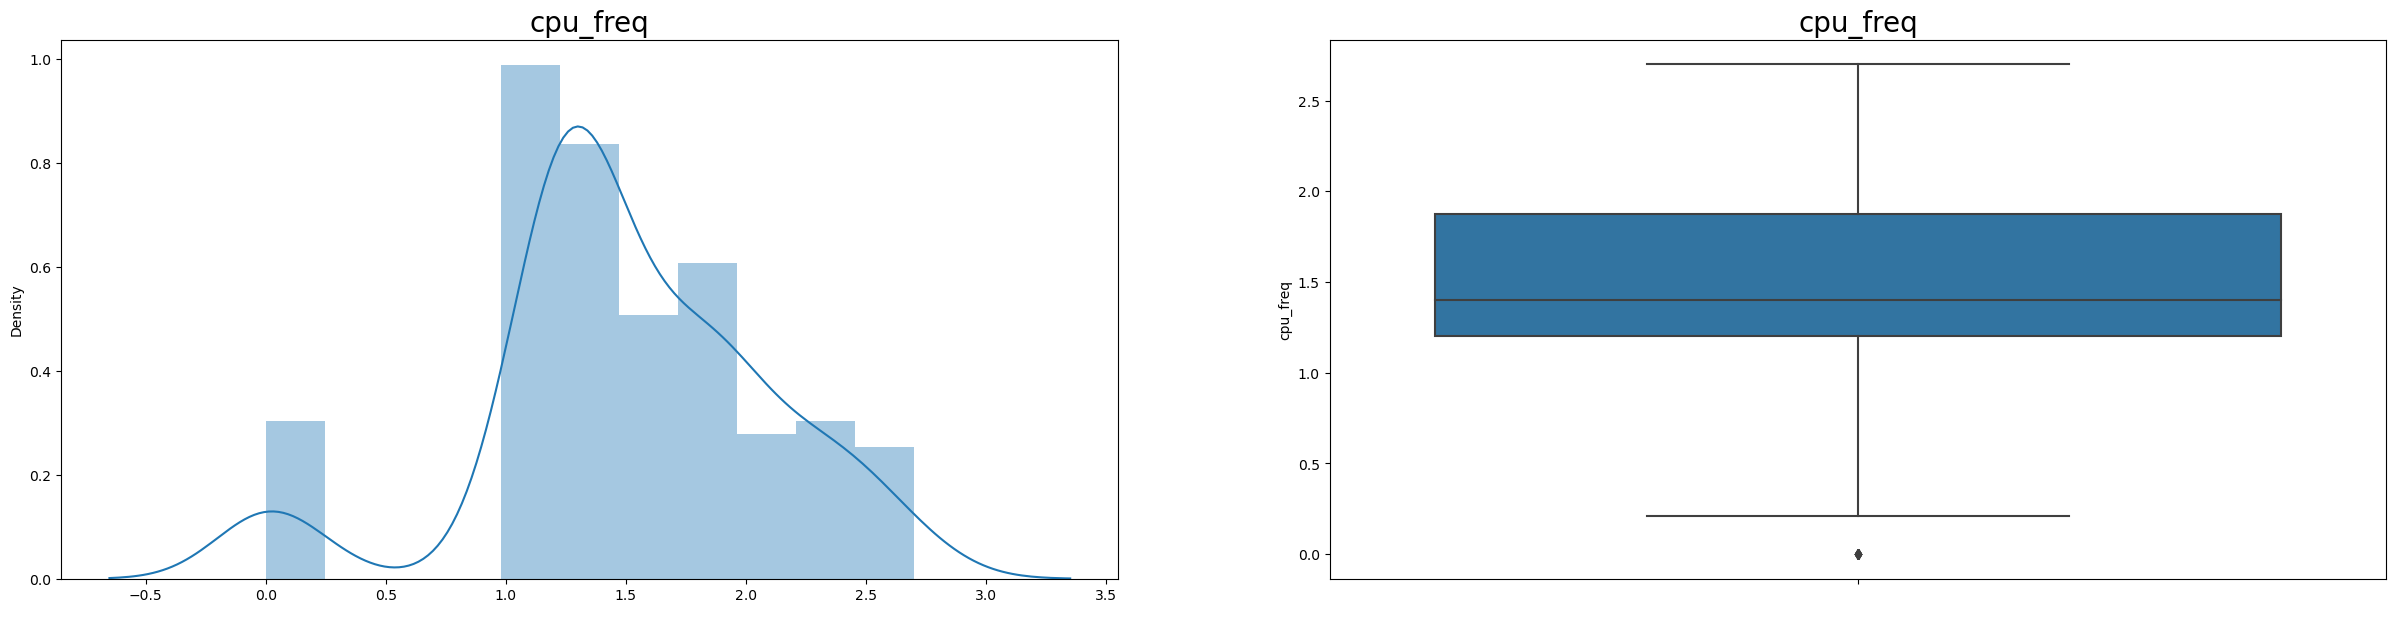

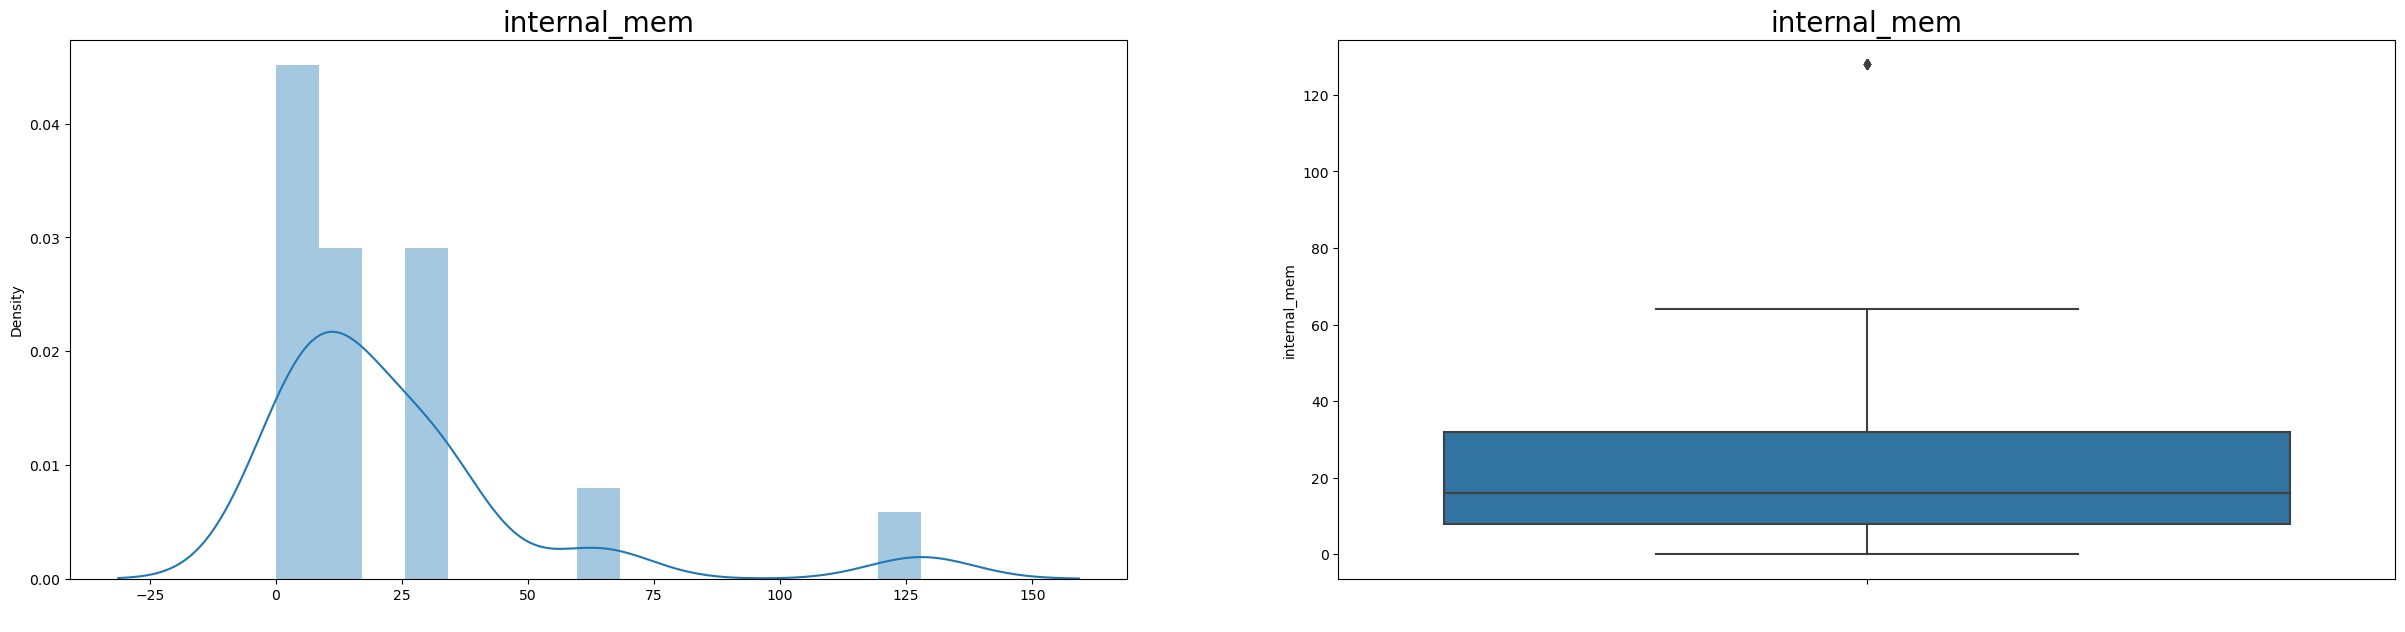

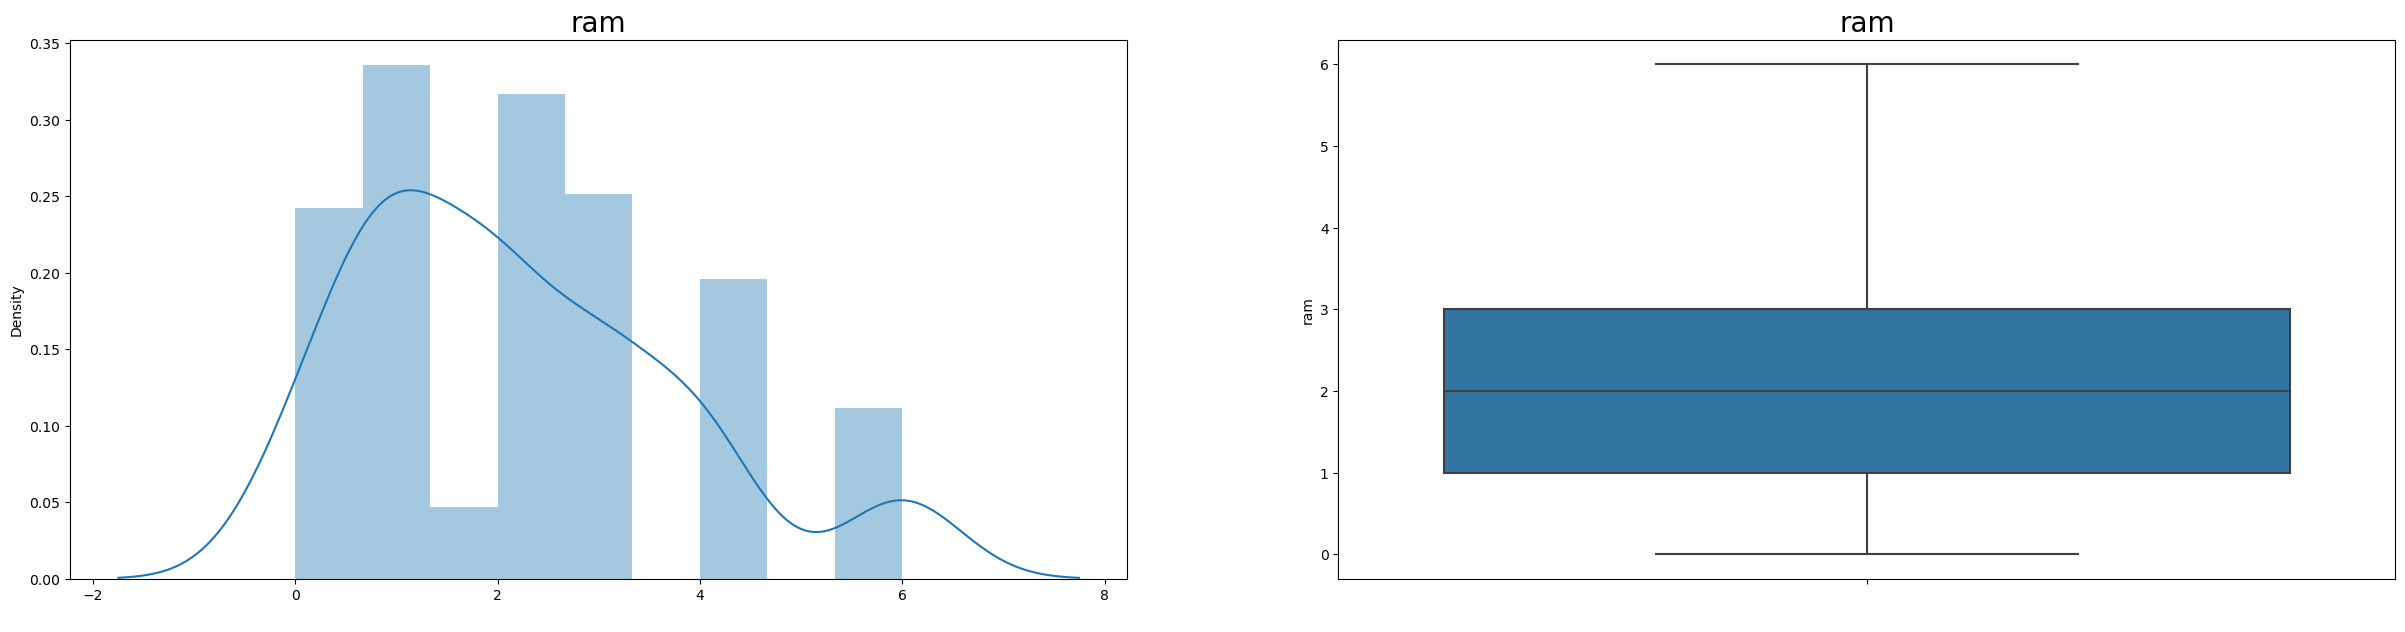

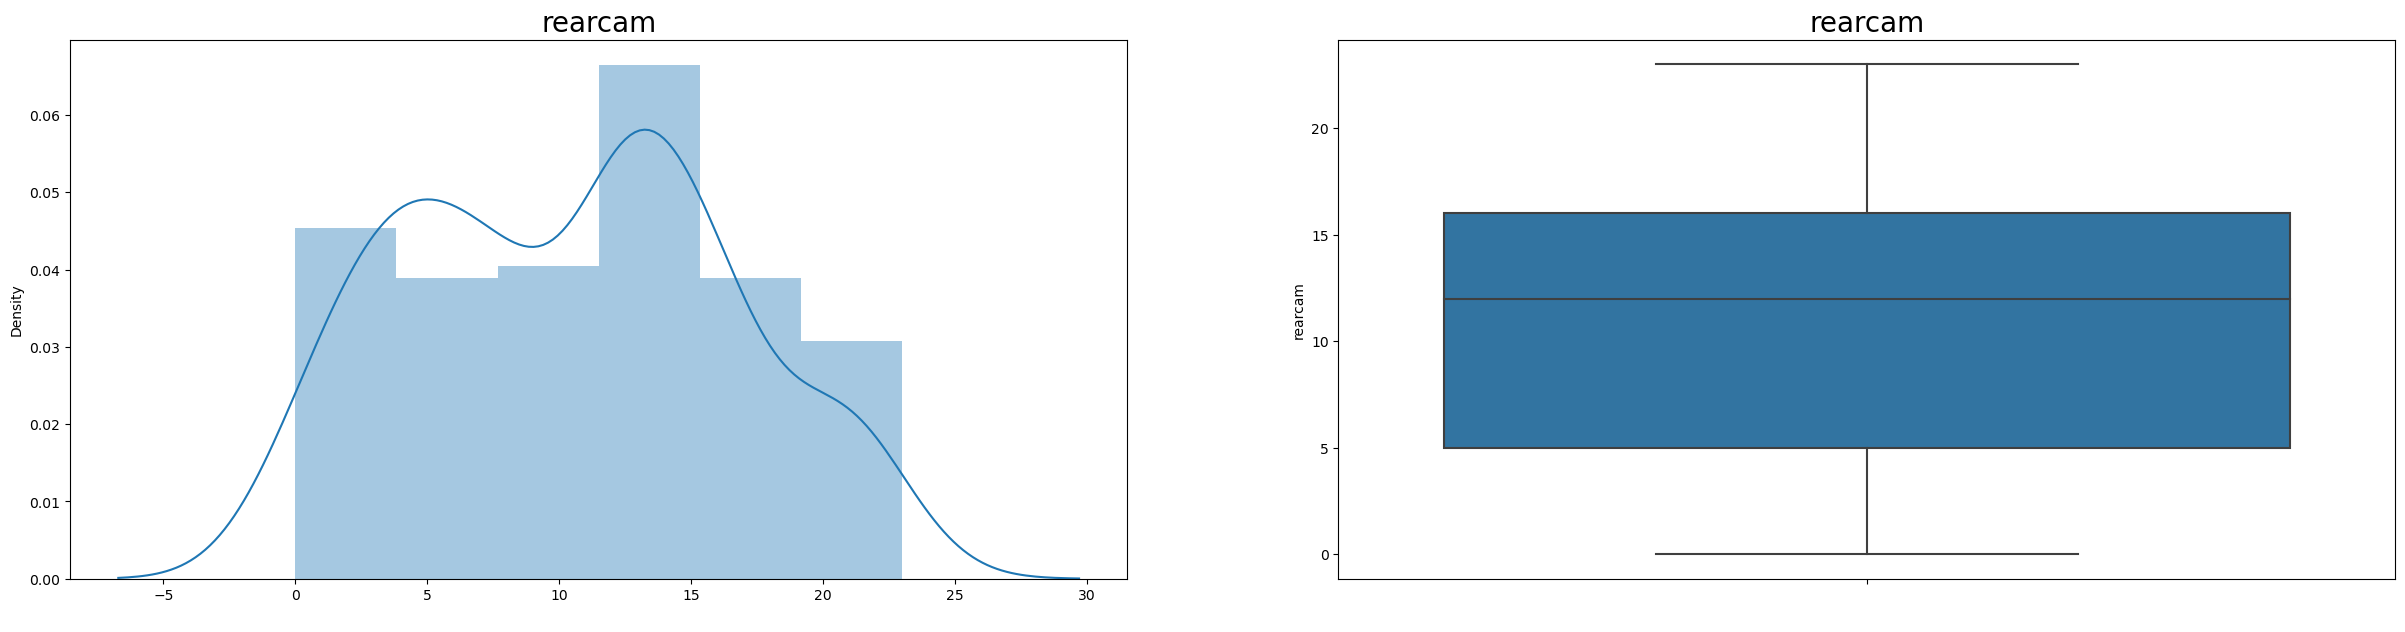

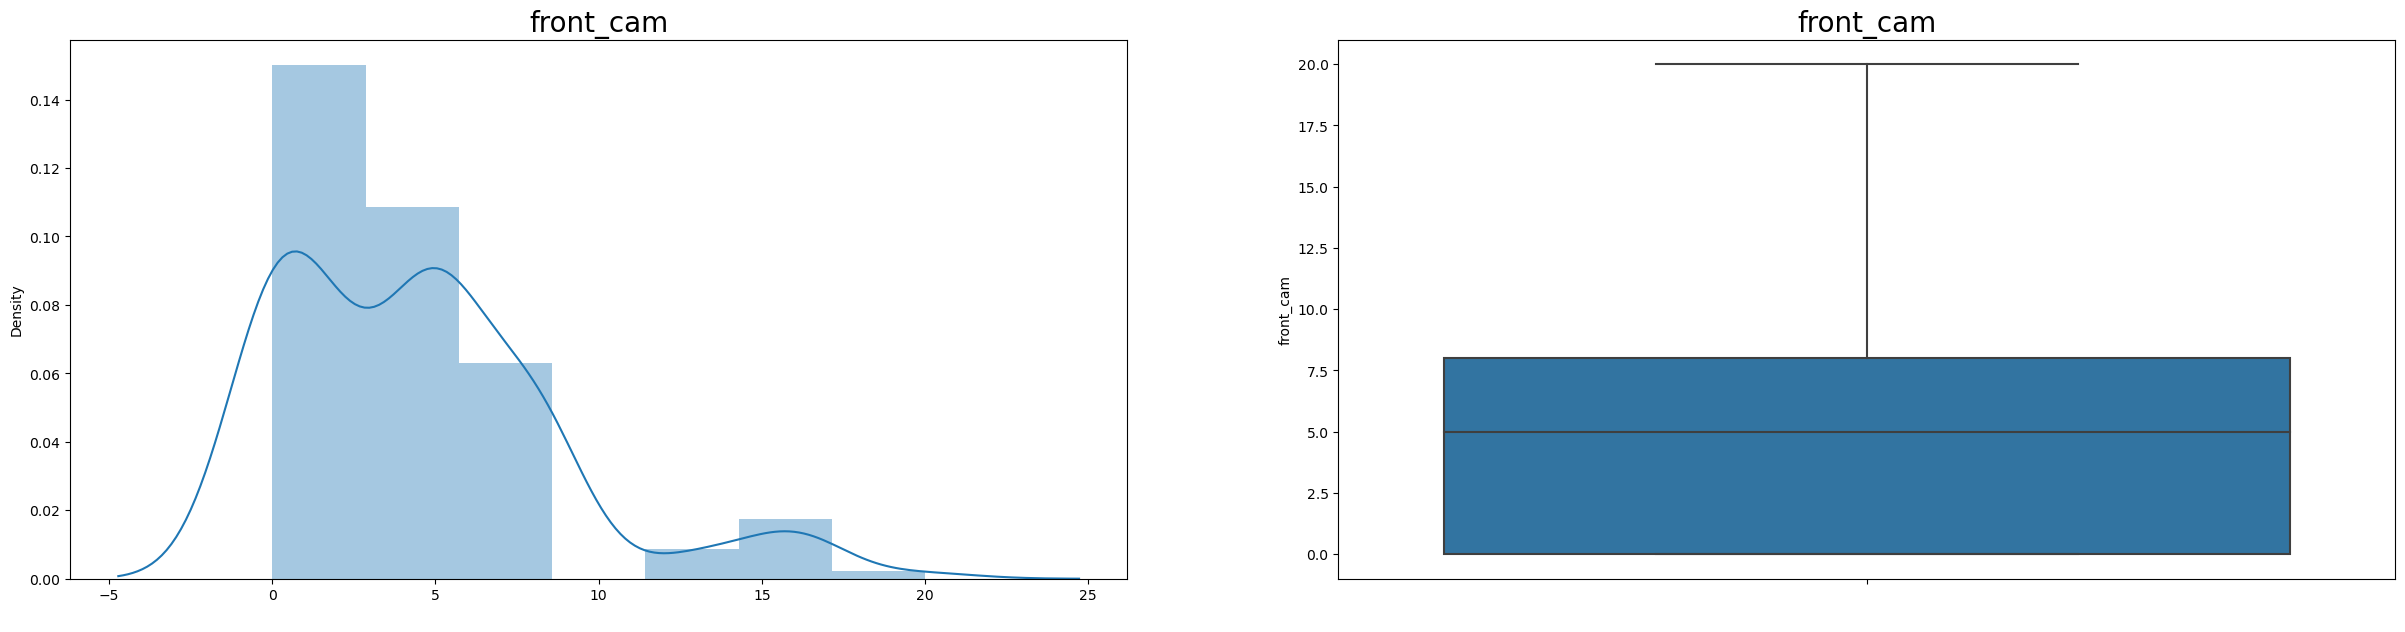

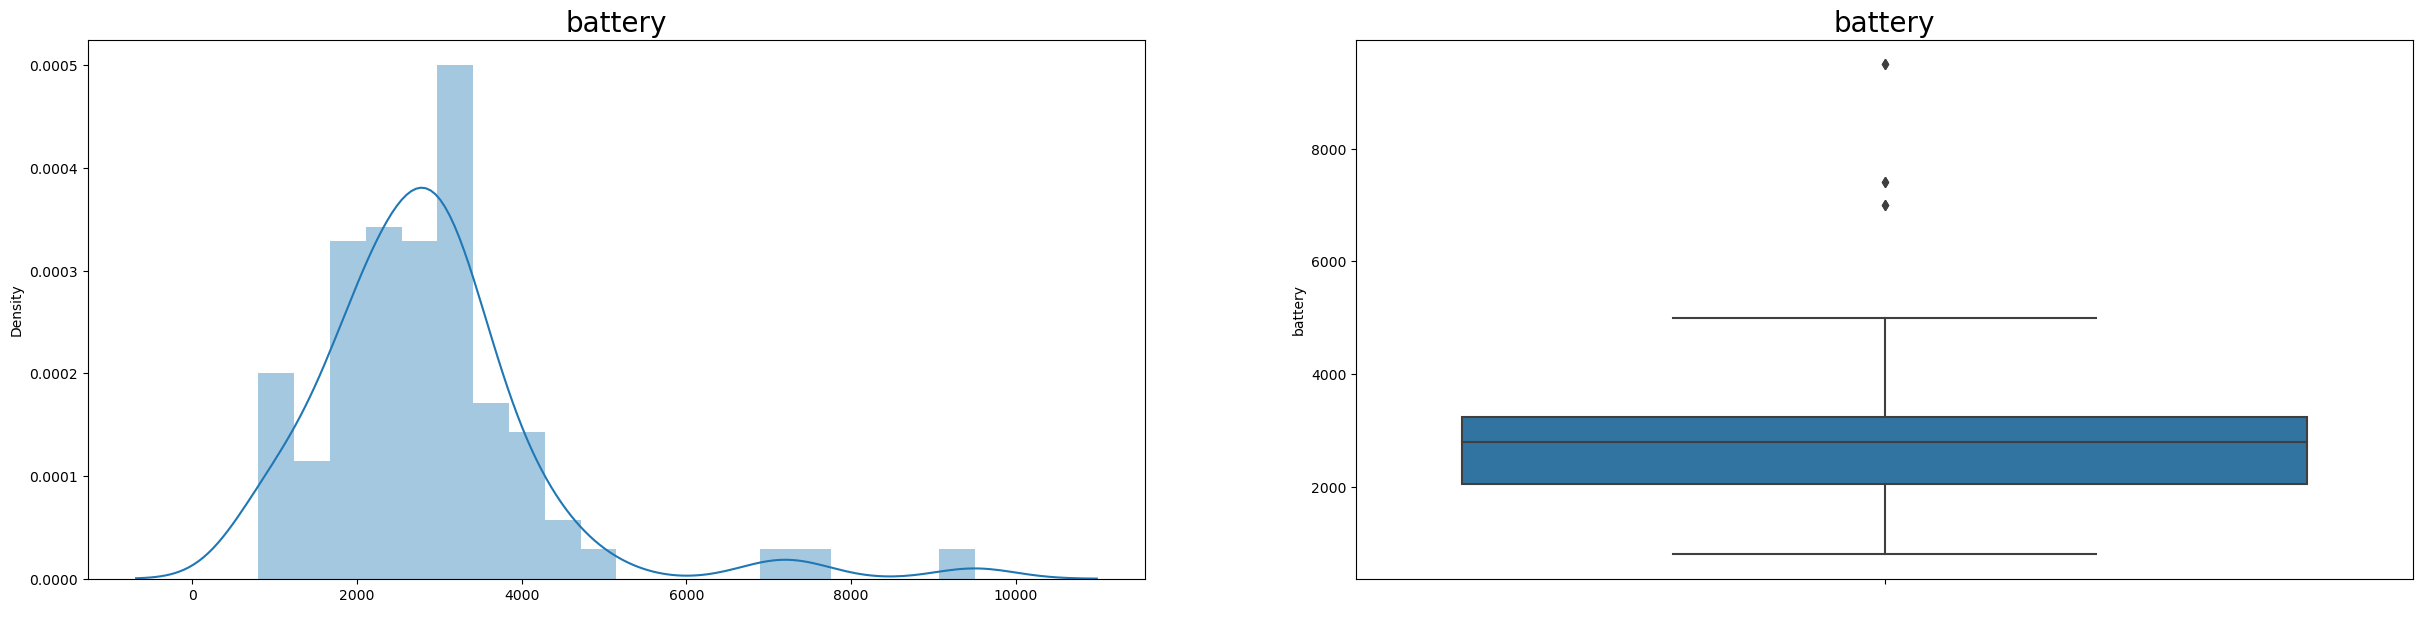

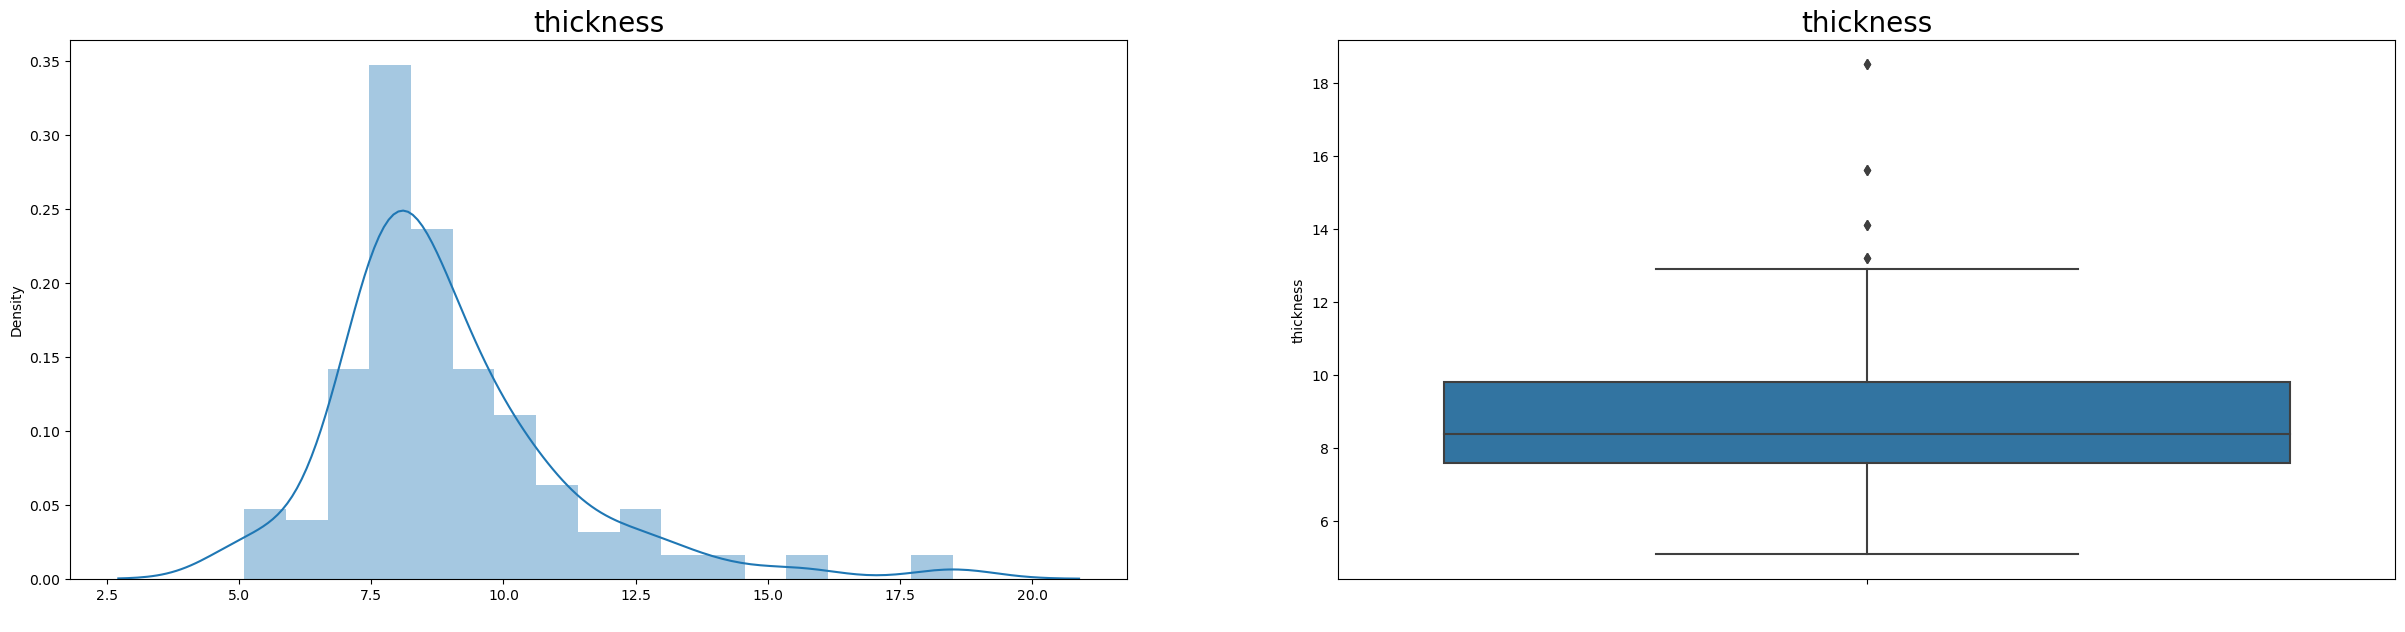

In [21]:
df_columns = df.columns
df_columns
for index,col in enumerate(df_columns):
    plt.figure(figsize = (30,7))
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.xlabel(" ")
    plt.title(col, size = 20)
    
    plt.subplot(1,2,2)
    sns.boxplot(y = df[col])
    plt.title(col, size = 20)
    plt.show()

# Scatter plot between all the independent variables and dependent variable

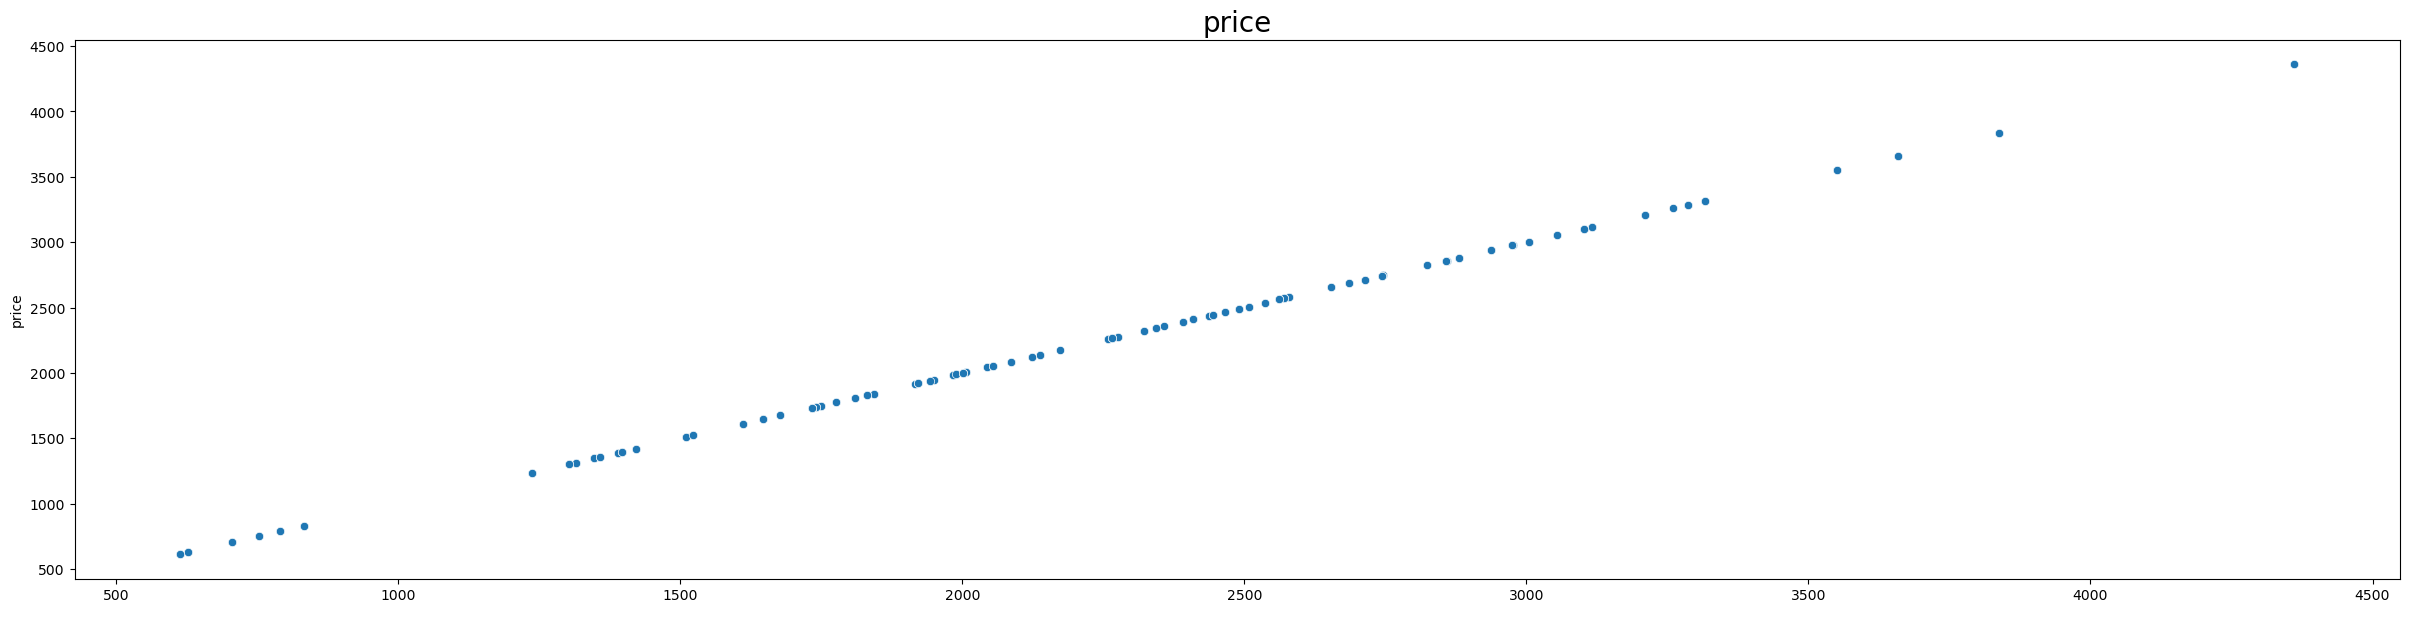

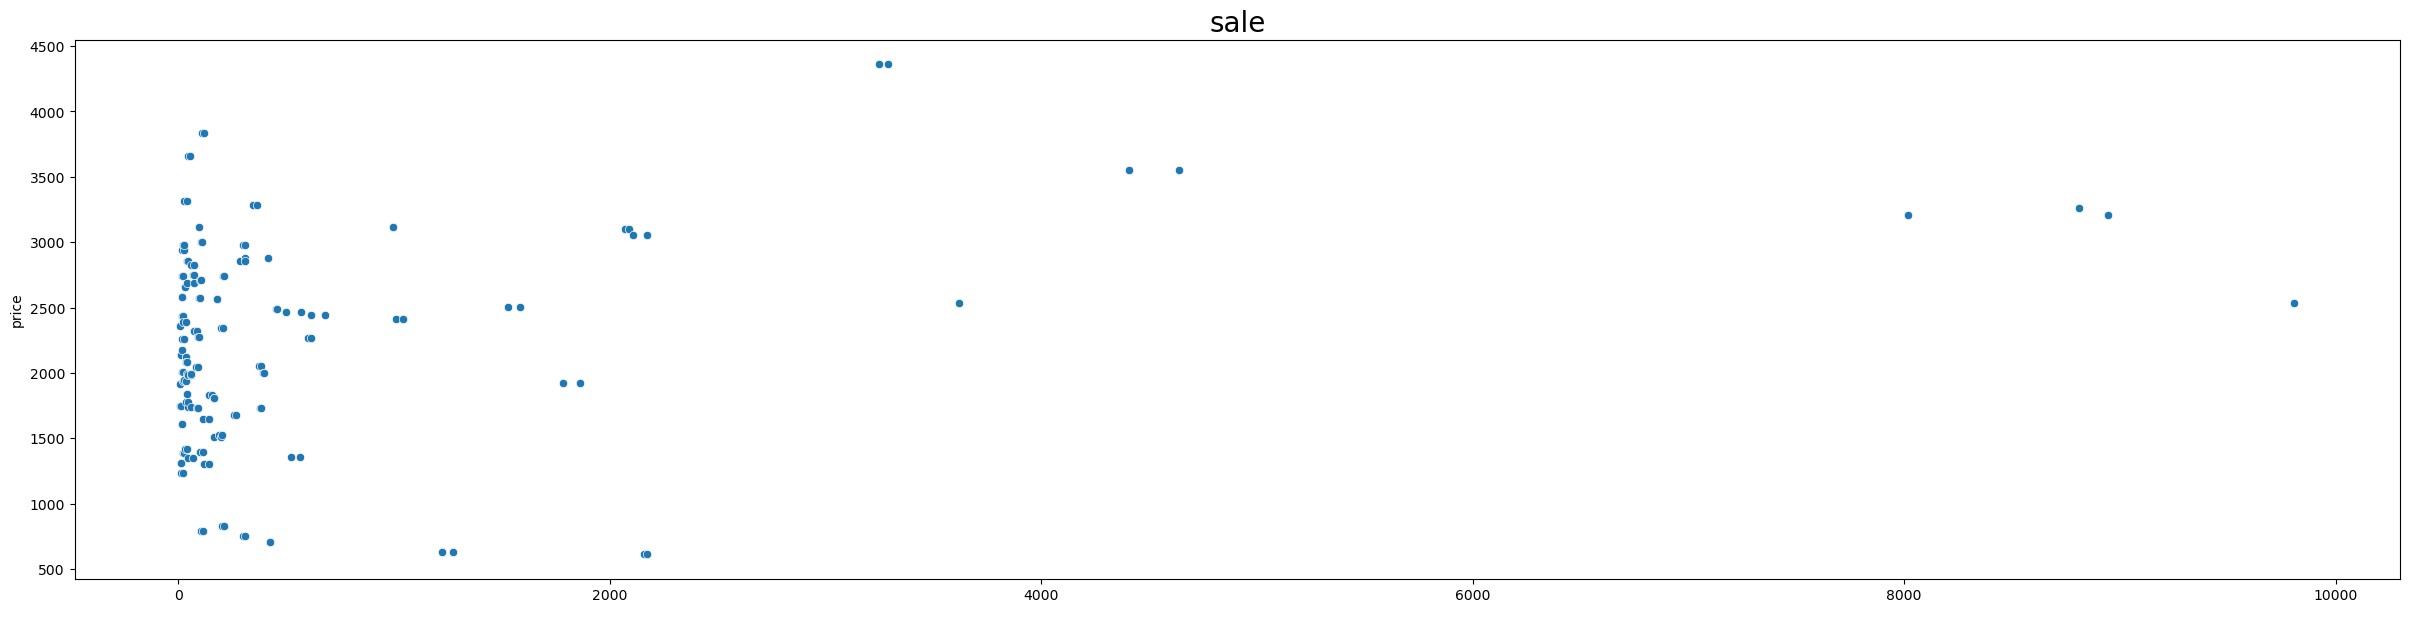

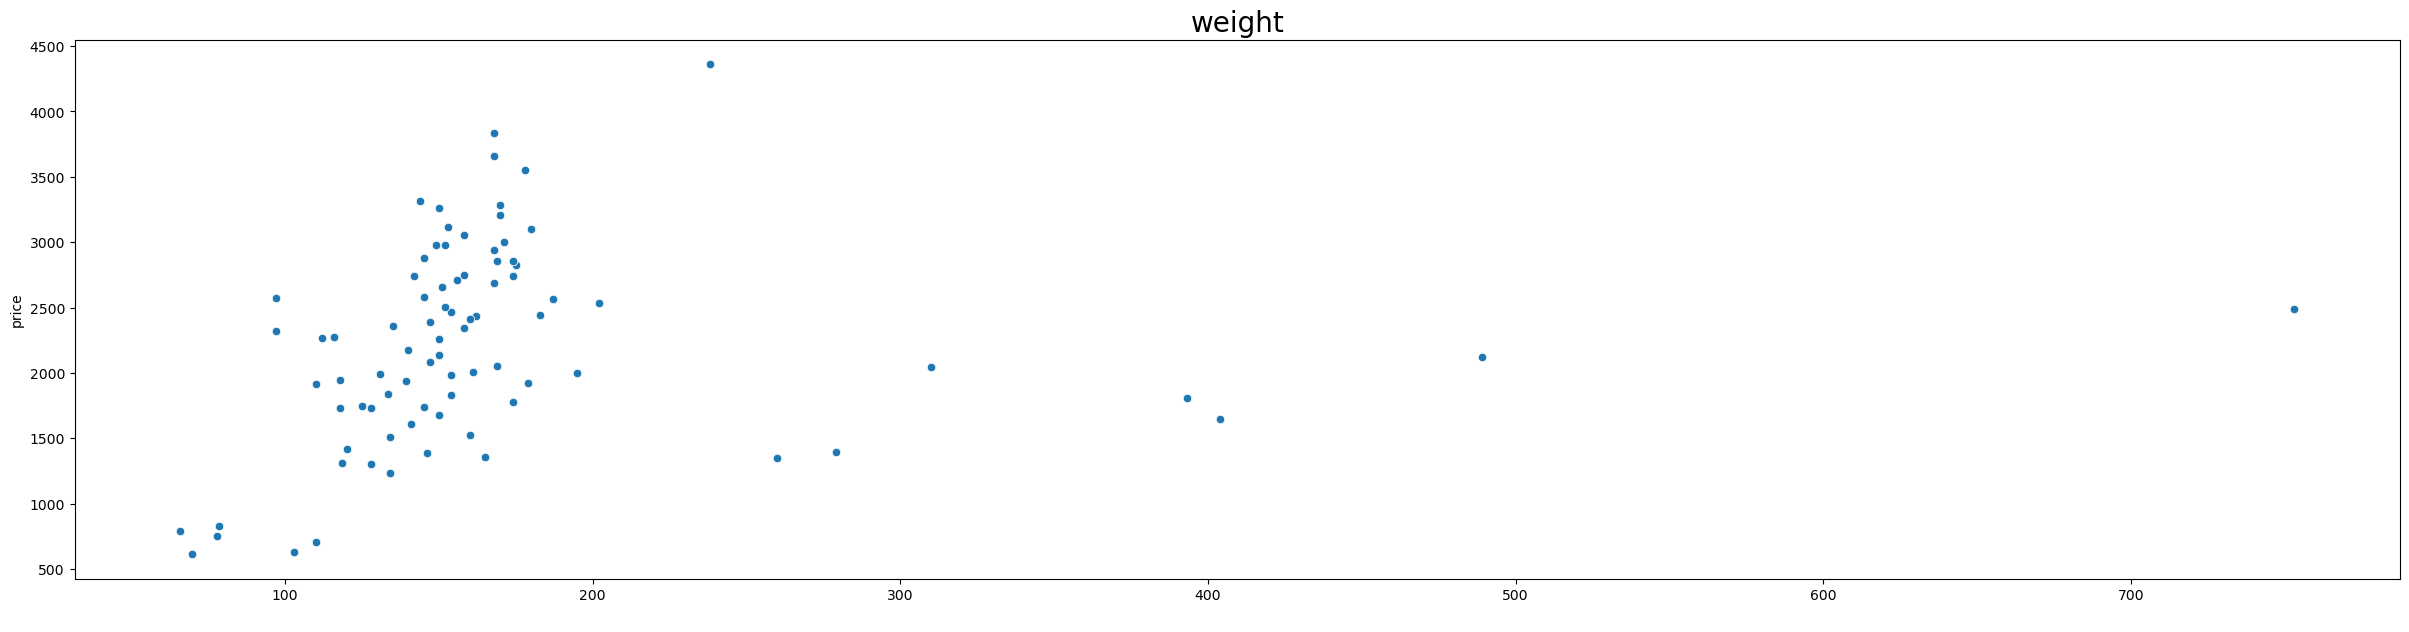

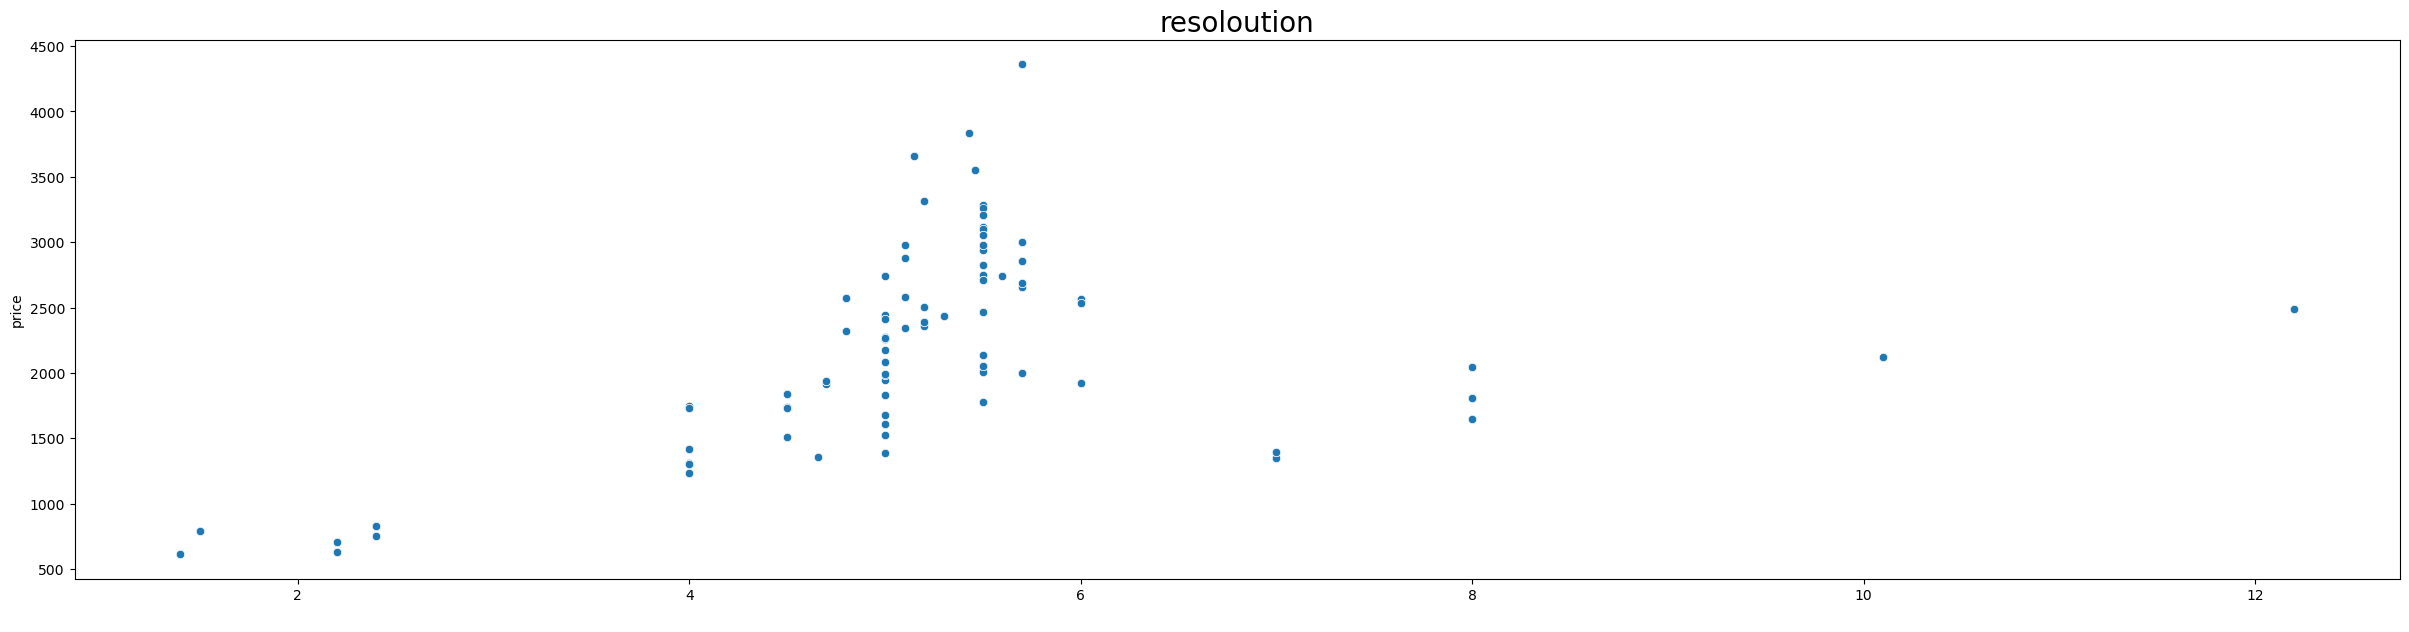

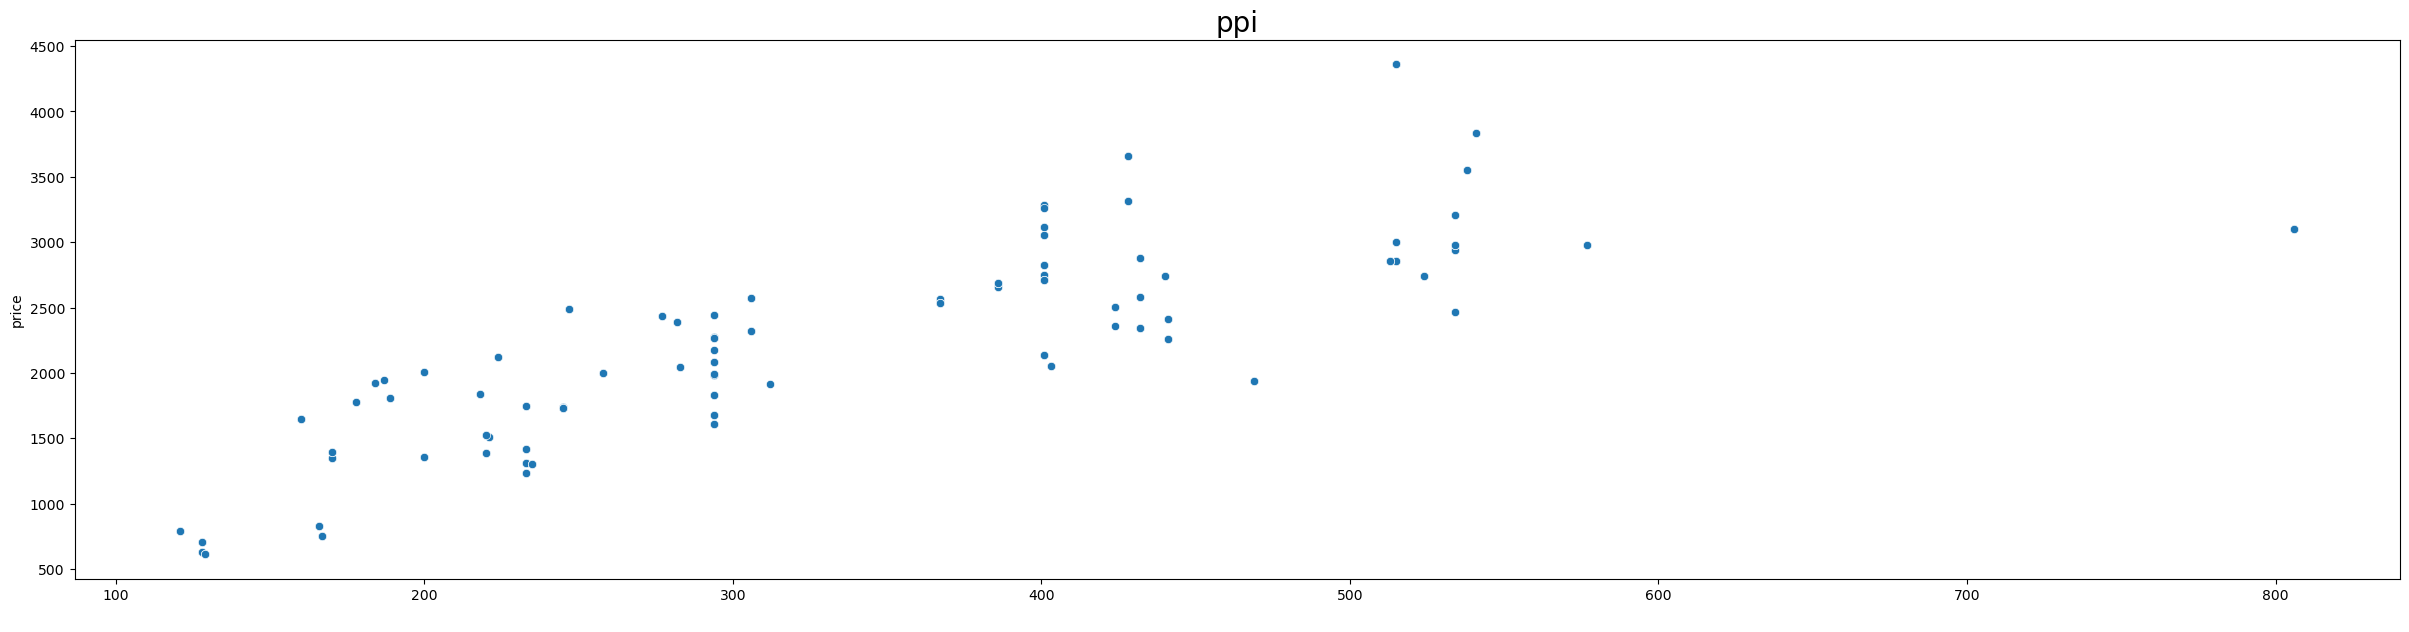

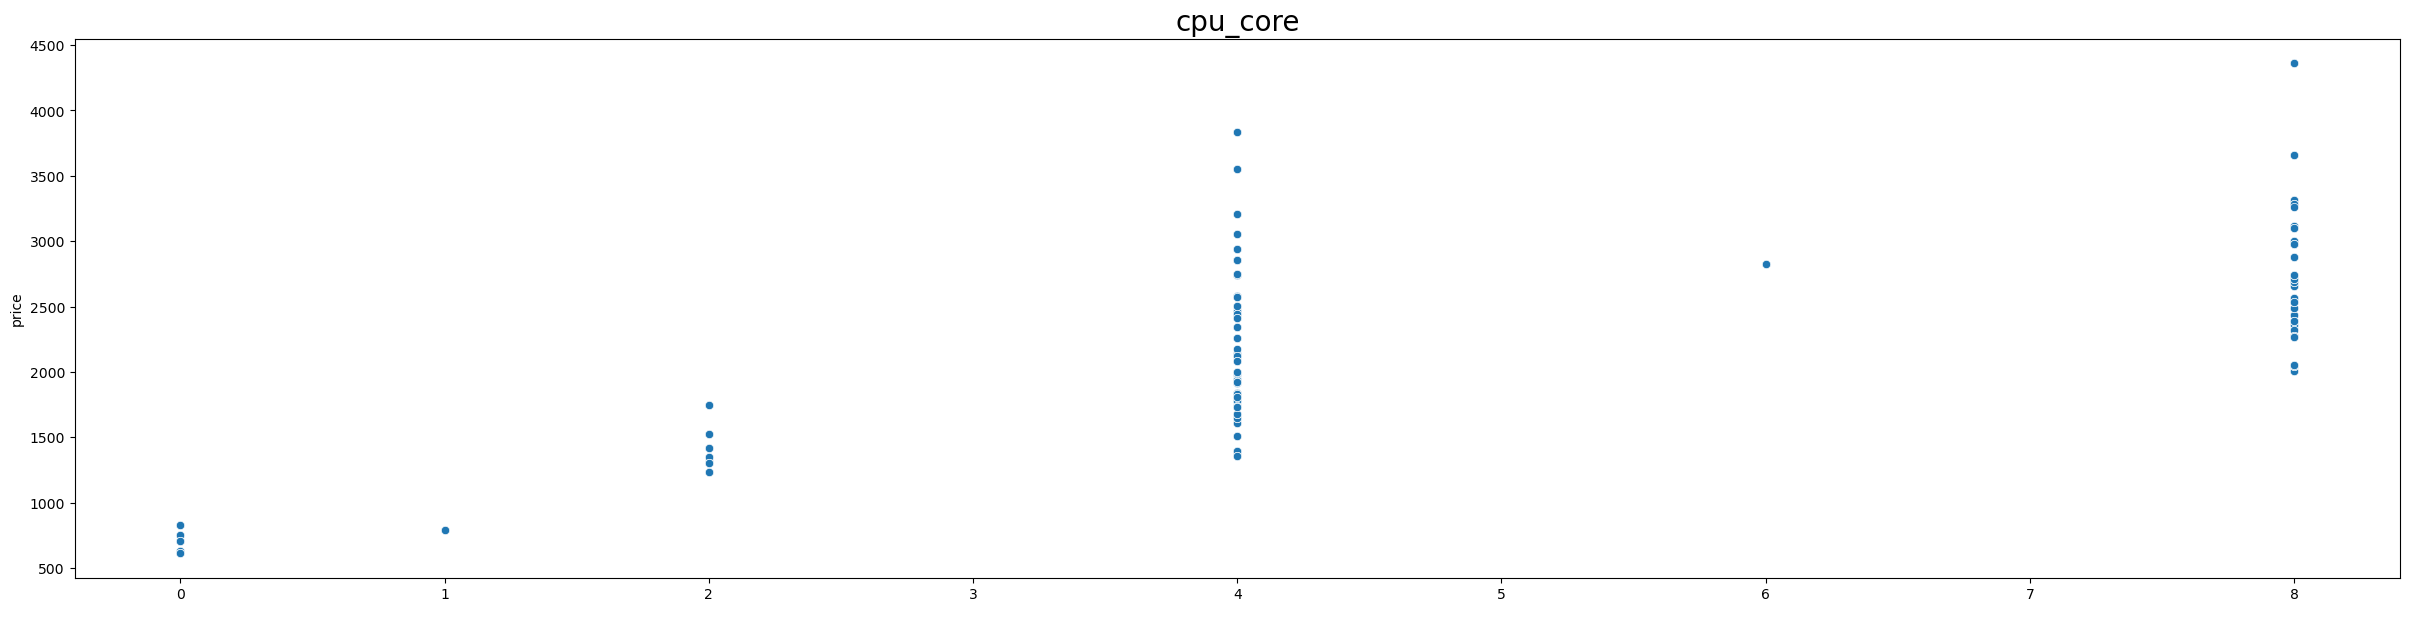

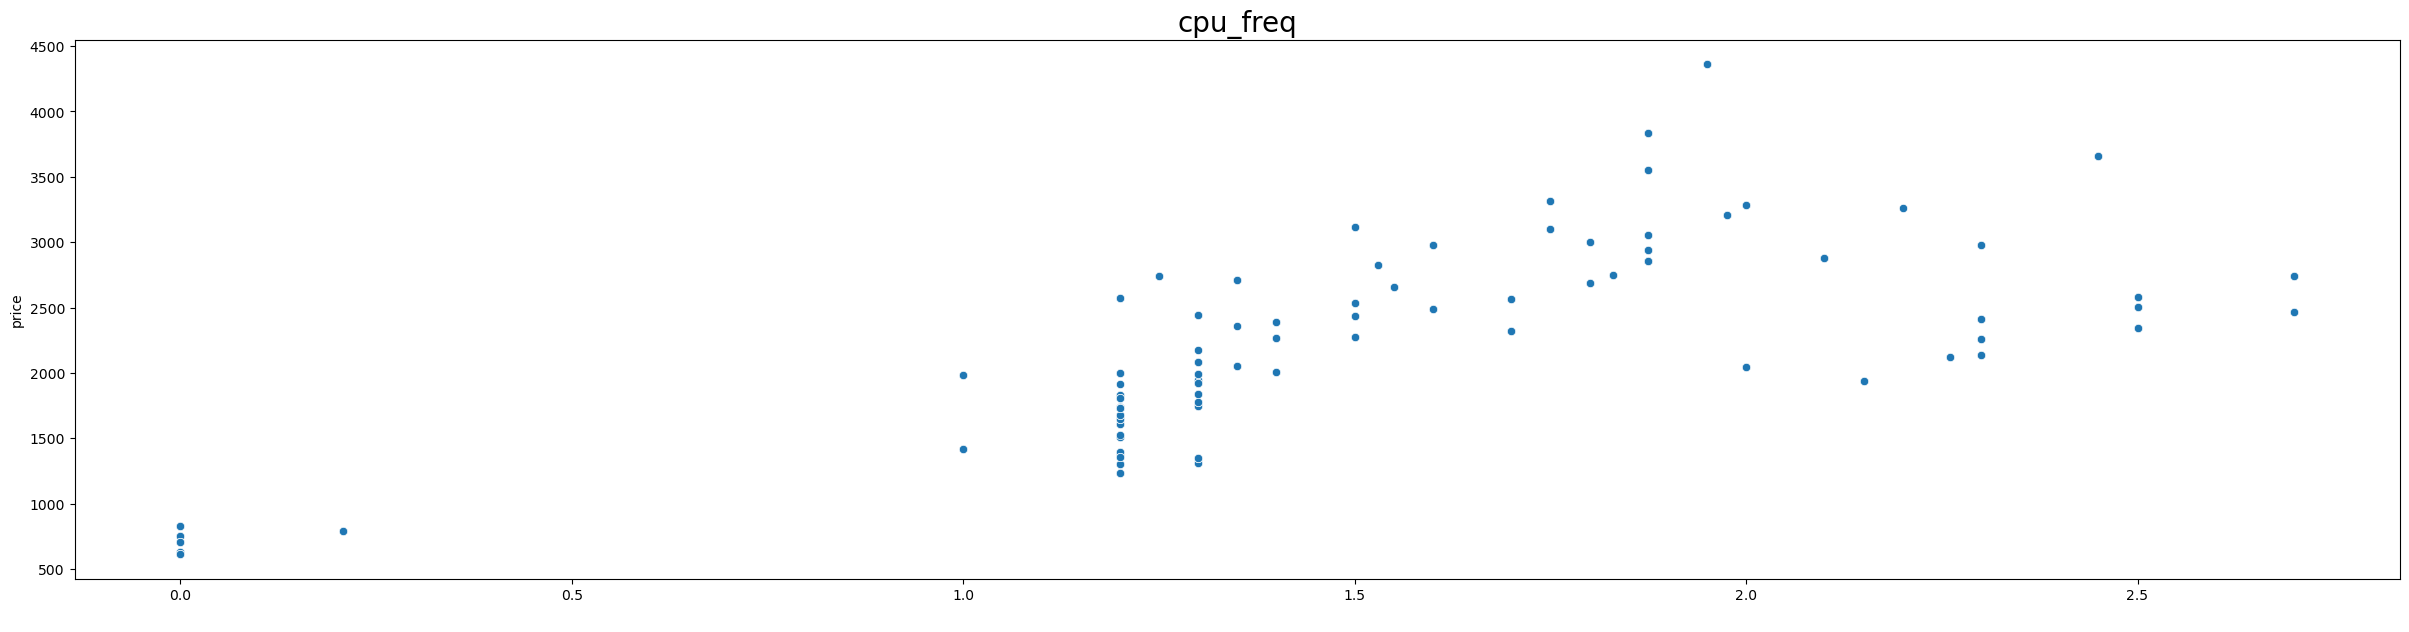

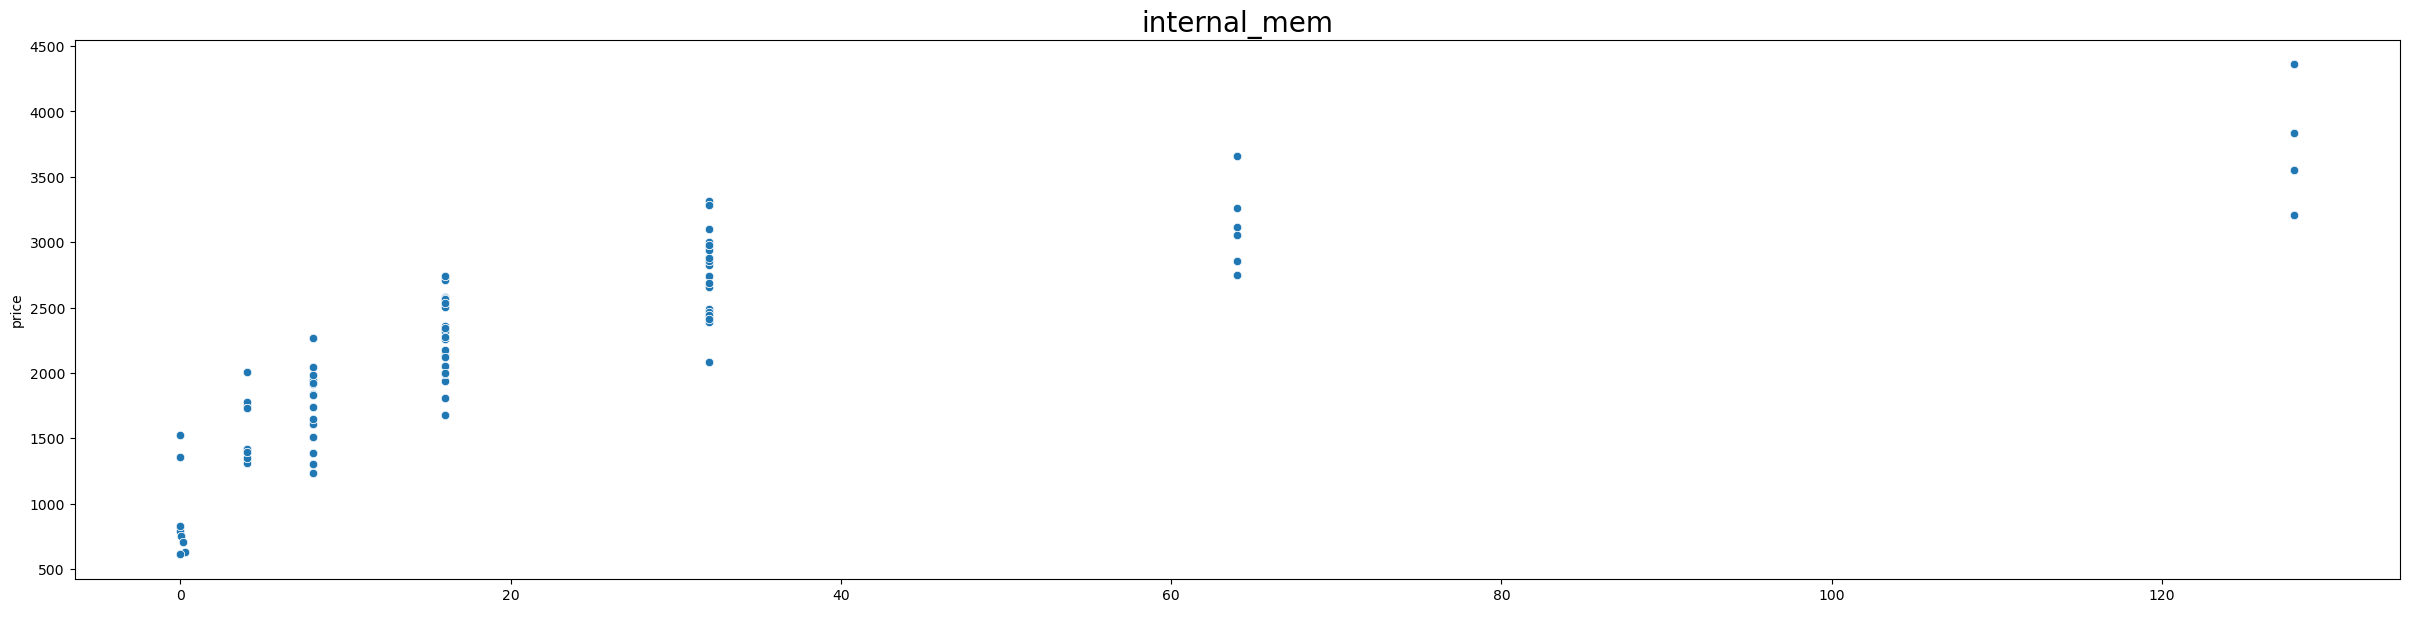

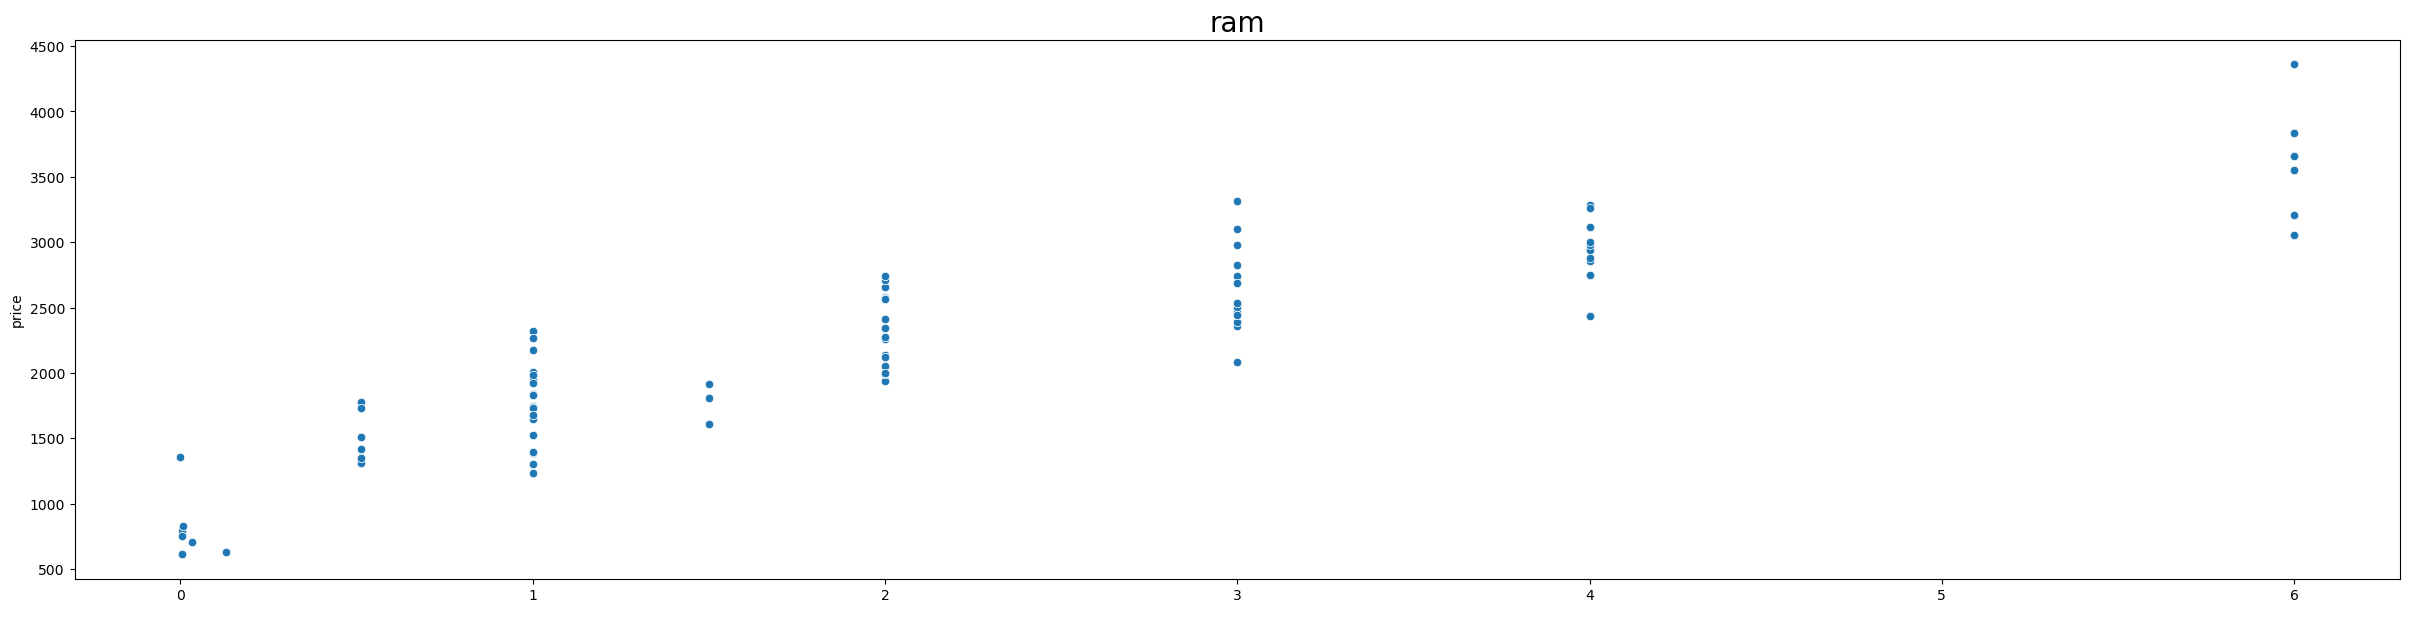

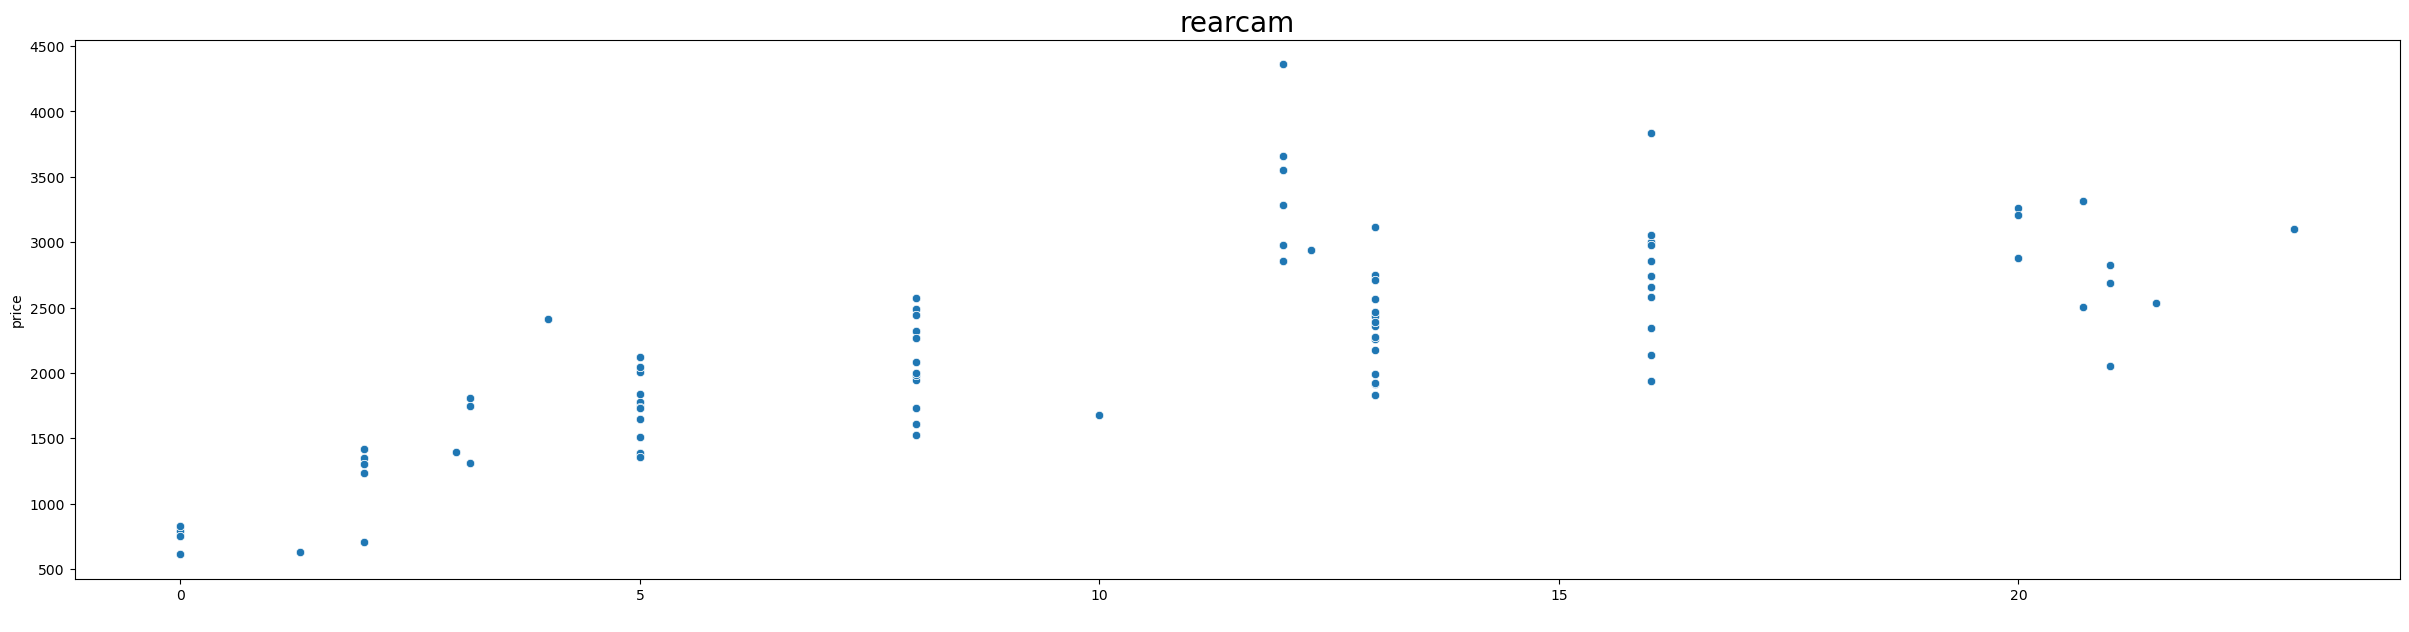

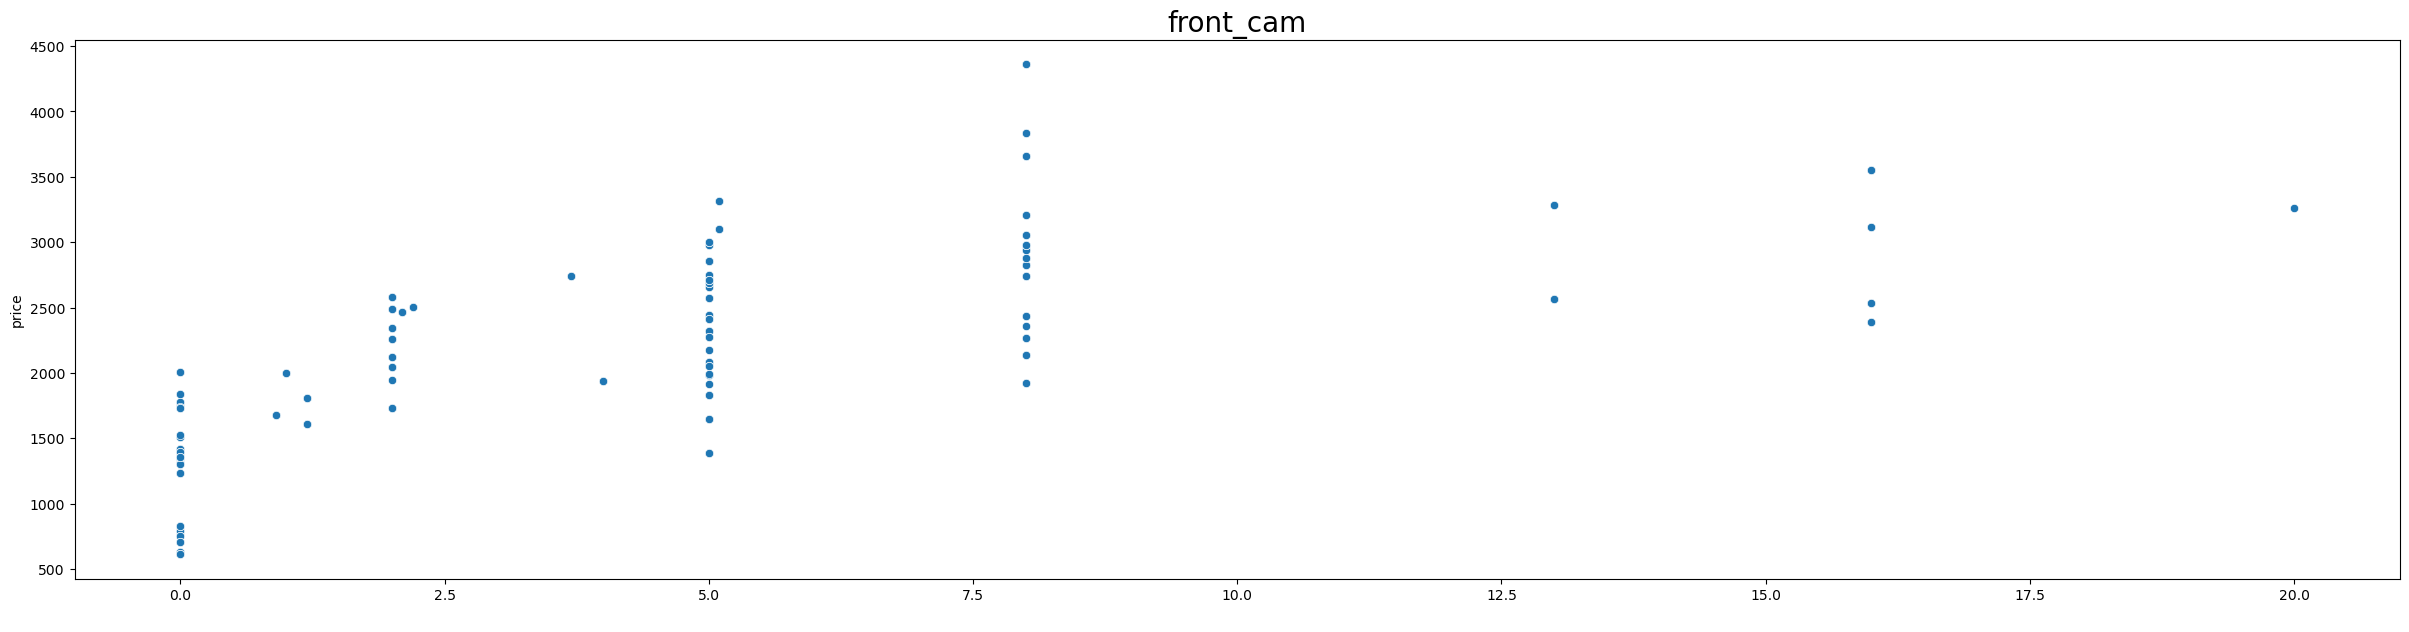

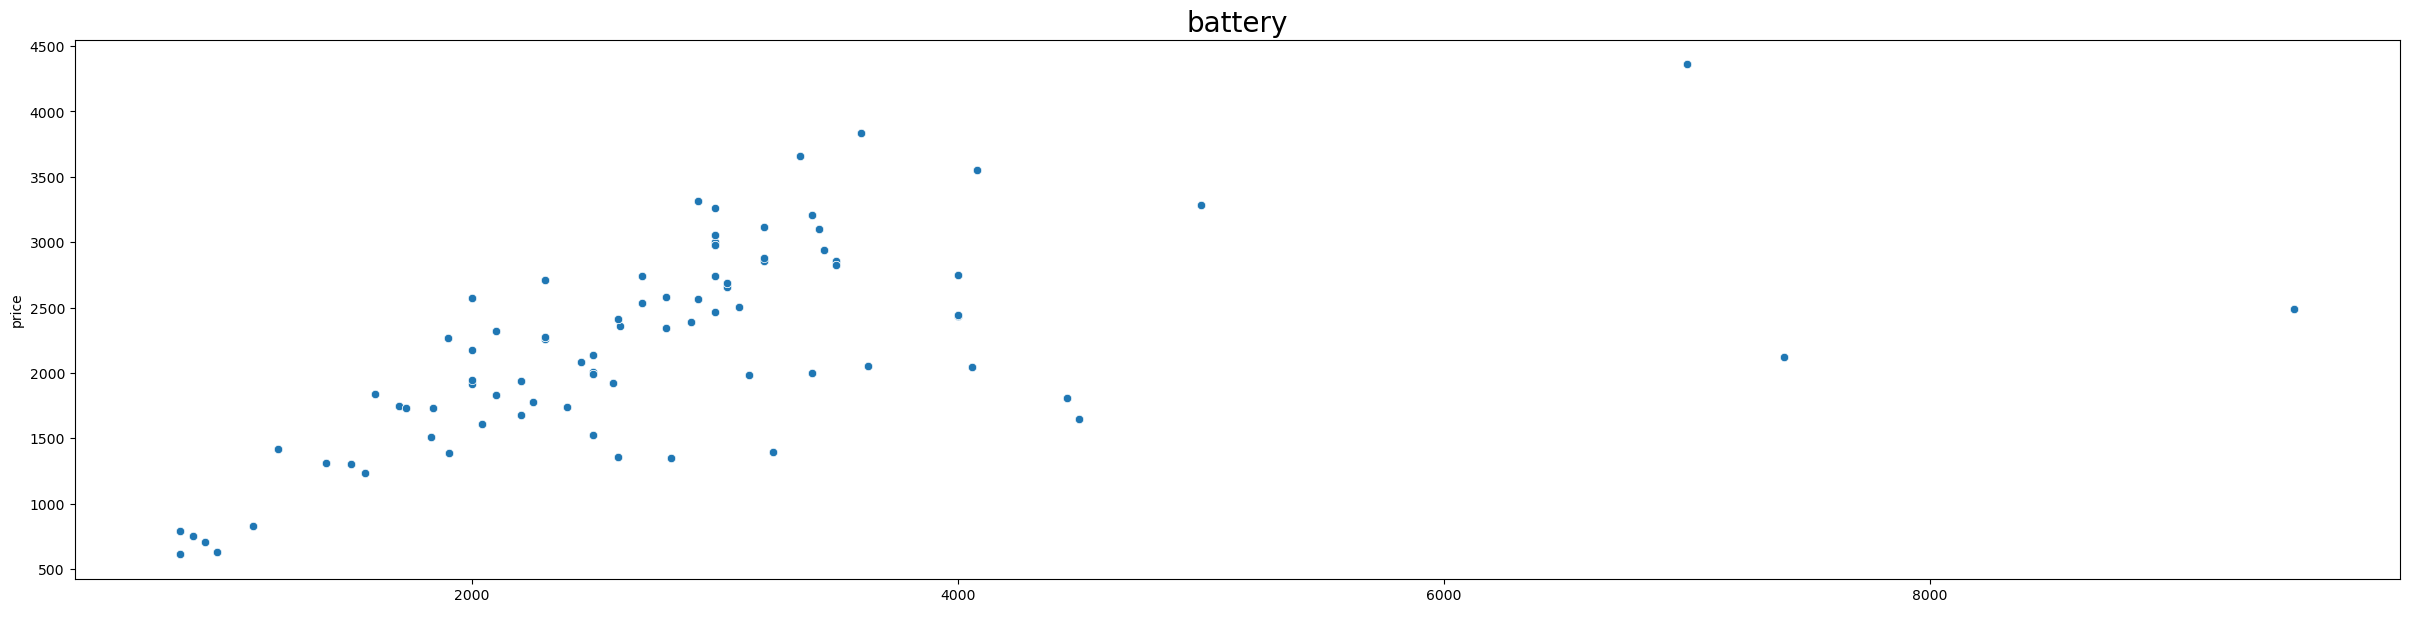

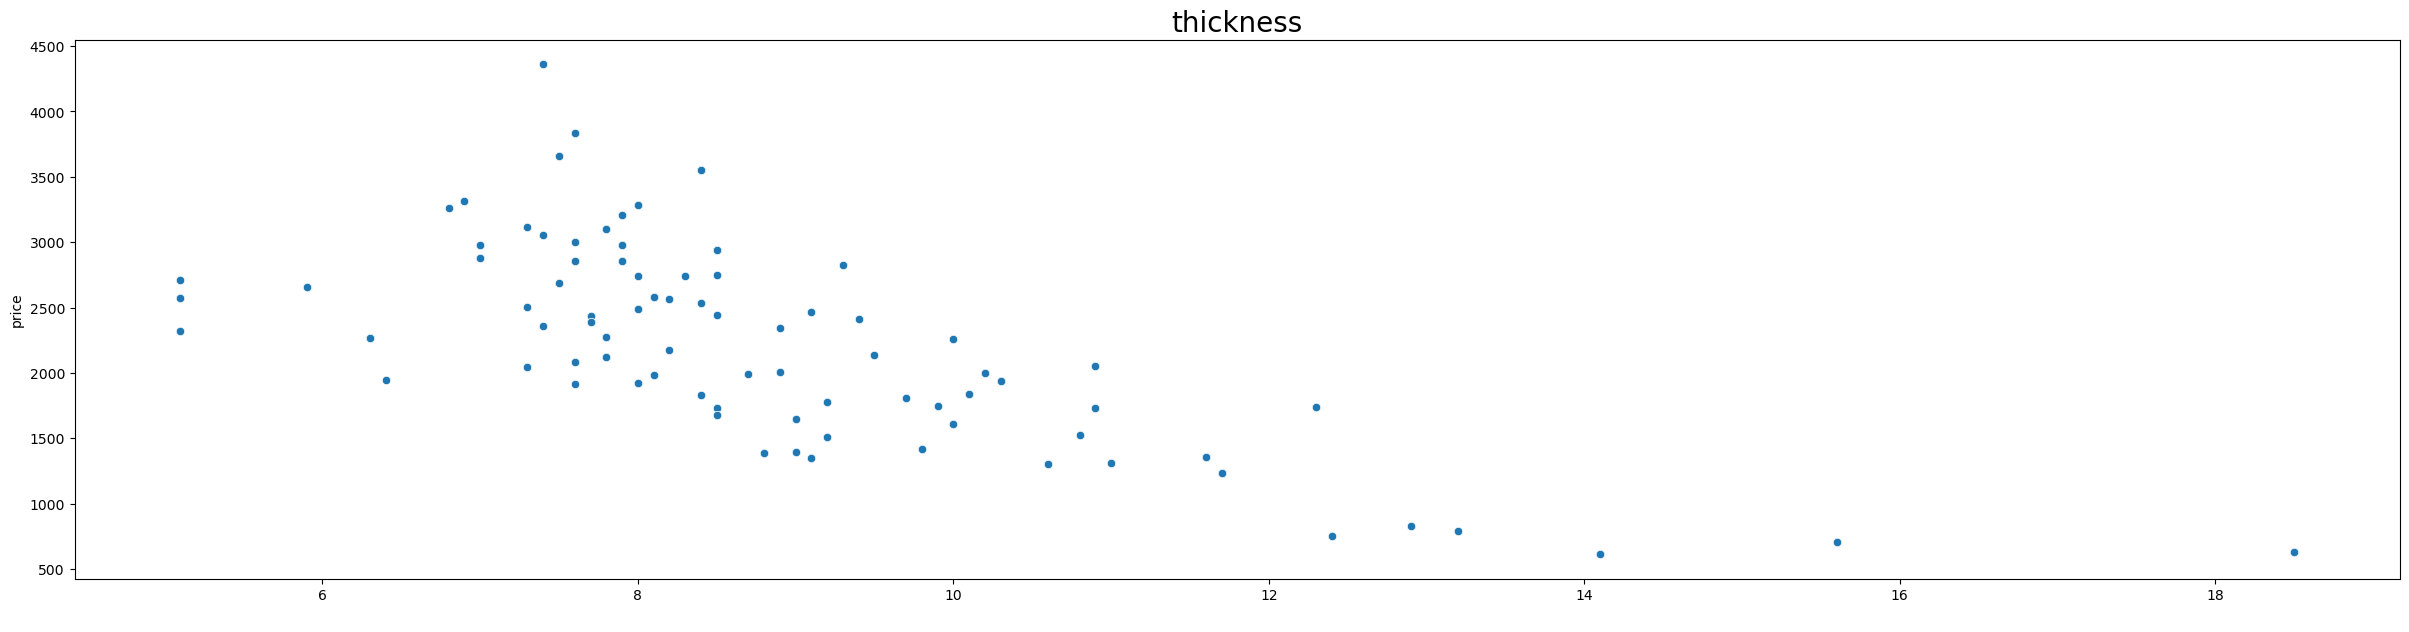

In [22]:
df_target = df["price"]

for col in df_columns:
    plt.figure(figsize = (30,7))
    sns.scatterplot(data = df, x = col, y = df_target)
    plt.xlabel(" ")
    plt.title(col,size = 20)
    plt.show()

# Reading the Dataset "naturalearth_lowres"

In [23]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Storing the values from price column of "df" dataframe to price column in "world" dataframe.

In [24]:
world['price'] = df['price']

In [25]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,price
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",2357.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",1749.0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",1916.0
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1315.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1749.0
...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN


# Visualizing the price column to compare the price in different region.

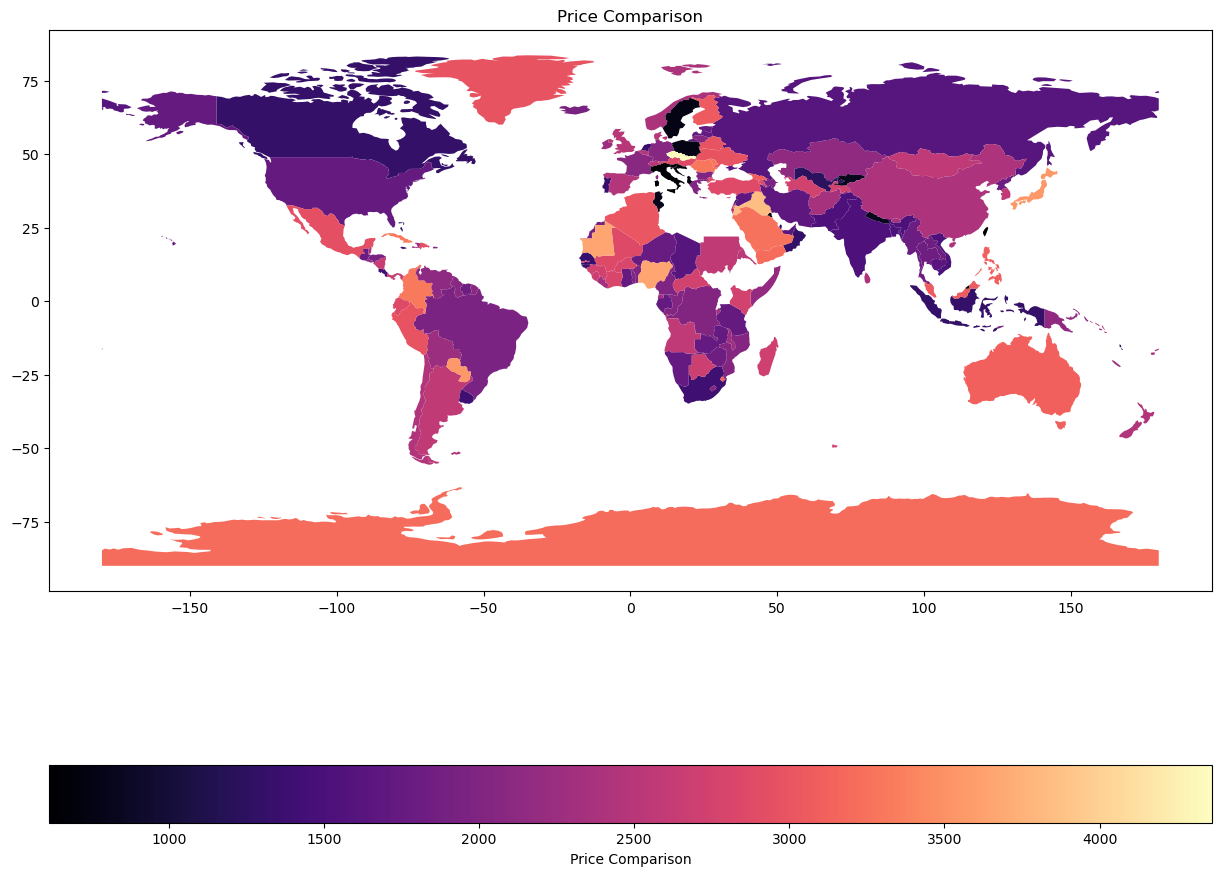

In [122]:
world.plot(column='price',legend= True,figsize = (15,15),cmap='magma' ,legend_kwds={'label': "Price Comparison",
                        'orientation': "horizontal"})
plt.title('Price Comparison')
plt.show()

In [27]:
df1=df.copy()
df1

,price,sale,weight,resoloution,ppi,cpu_core,cpu_freq,internal_mem,ram,rearcam,front_cam,battery,thickness
0,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [28]:

from sklearn.preprocessing import MinMaxScaler


# Select the columns to be scaled
cols_to_scale = ['weight', 'price','resoloution', 'ppi','cpu_core','cpu_freq','internal_mem','ram','rearcam','front_cam','battery','thickness']

# Create the scaler object
scaler = MinMaxScaler()

# Fit and transform the data
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

# View the transformed data
print(df1.head())


      price  sale    weight  resoloution       ppi  cpu_core  cpu_freq  \
0  0.465172    10  0.100437     0.351852  0.442336      1.00  0.500000   
1  0.302909    10  0.085881     0.240741  0.163504      0.25  0.481481   
2  0.347478    10  0.064047     0.305556  0.278832      0.50  0.444444   
3  0.187083    11  0.076419     0.240741  0.163504      0.25  0.481481   
4  0.302909    11  0.085881     0.240741  0.163504      0.25  0.481481   

   internal_mem       ram   rearcam  front_cam   battery  thickness  
0       0.12500  0.500000  0.565217       0.40  0.208046   0.171642  
1       0.03125  0.166667  0.136957       0.00  0.103448   0.358209  
2       0.06250  0.250000  0.565217       0.25  0.137931   0.186567  
3       0.03125  0.085333  0.136957       0.00  0.068966   0.440299  
4       0.03125  0.166667  0.136957       0.00  0.103448   0.358209  


# Linear regression model to predict the price of a mobile phone based on it's pixel per inch value.

In [29]:
#Separating the target and feature variables
X = df1['ppi'].values.reshape(-1,1)
y = df1['price']

In [30]:
#splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

In [31]:
#fitting the model
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [32]:
#predicting the model using test data
y_pred = reg.predict(X_test)

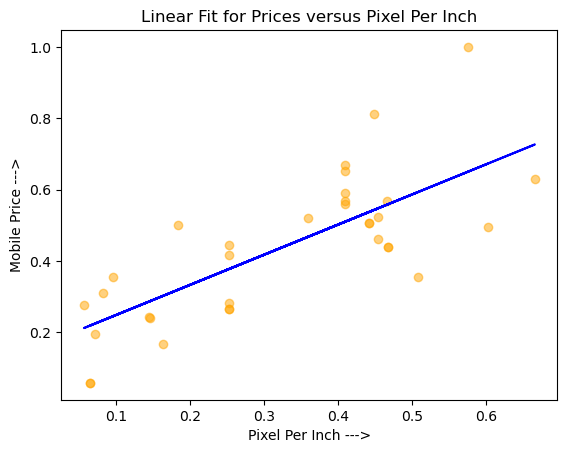

In [33]:
#scatterplot
plt.scatter(X_test,y_test, color = 'Orange', alpha = 0.5)
plt.plot(X_test, y_pred, color = "Blue")
plt.ylabel("Mobile Price --->")
plt.xlabel("Pixel Per Inch --->")
plt.title("Linear Fit for Prices versus Pixel Per Inch")
plt.show()

In [34]:
print("R-squared", reg.score(X_test,y_test),"\n",
     "MSE", mean_squared_error(y_test,y_pred, squared = True))

R-squared 0.5774932089340243 
 MSE 0.01705942389950291


# Graph showing Predicted vs Actual values

In [35]:
#plt.plot(y_test, label='Actual')
#plt.plot(y_pred, label='Predicted')
#plt.legend()
#plt.title('Predicted vs. Actual Values of Prices versus Pixel Per Inch')
#plt.show()

# Linear regression model to predict the price of a mobile phone based on it's Rear Camera value.

In [36]:
#Separating the target and feature variables
X = df1['rearcam'].values.reshape(-1,1)
y = df1['price']

In [37]:
#splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

In [38]:
#fitting the model
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [39]:
#predicting the model using test data
y_pred = reg.predict(X_test)

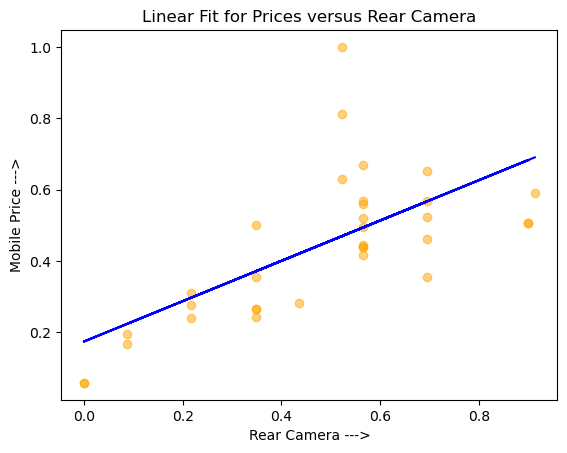

In [40]:
#scatterplot
plt.scatter(X_test,y_test, color = 'Orange', alpha = 0.5)
plt.plot(X_test, y_pred, color = "Blue")
plt.ylabel("Mobile Price --->")
plt.xlabel("Rear Camera --->")
plt.title("Linear Fit for Prices versus Rear Camera")
plt.show()

In [41]:
print("R-squared", reg.score(X_test,y_test),"\n",
     "MSE", mean_squared_error(y_test,y_pred, squared = True))

R-squared 0.4528434922351945 
 MSE 0.022092366330447723


# Graph showing Predicted vs Actual values

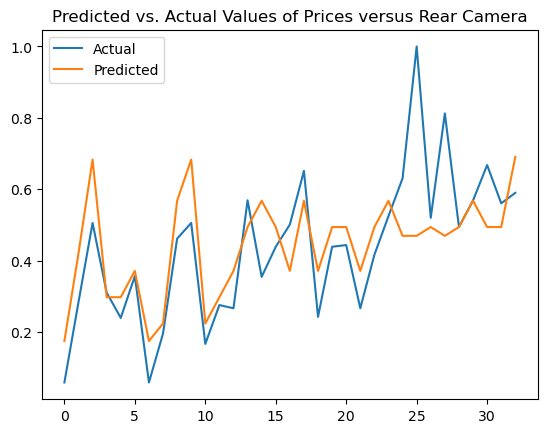

In [42]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Predicted vs. Actual Values of Prices versus Rear Camera')
plt.show()

In [43]:
print(reg.intercept_, reg.coef_)

0.17451153833562555 [0.56520928]


# Linear regression model to predict the price of a mobile phone based on it's Front Camera value.

In [44]:
#Separating the target and feature variables
X = df1['front_cam'].values.reshape(-1,1)
y = df1['price']

In [45]:
#splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

In [46]:
#fitting the model
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [47]:
#predicting the model using test data
y_pred = reg.predict(X_test)

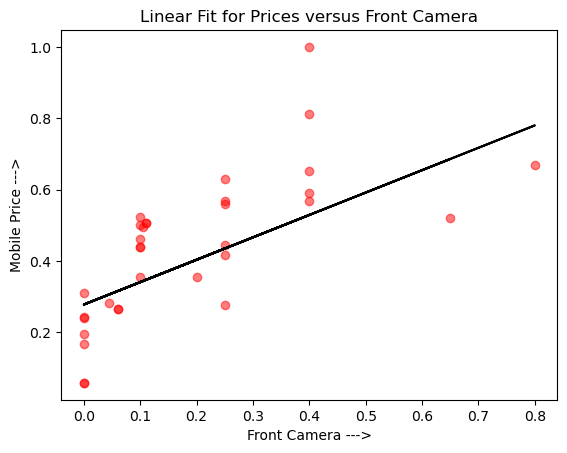

In [48]:
#scatterplot
plt.scatter(X_test,y_test, color = 'Red', alpha = 0.5)
plt.plot(X_test, y_pred, color = "Black")
plt.ylabel("Mobile Price --->")
plt.xlabel("Front Camera --->")
plt.title("Linear Fit for Prices versus Front Camera")
plt.show()

In [49]:
print("R-squared", reg.score(X_test,y_test),"\n",
     "MSE", mean_squared_error(y_test,y_pred, squared = True))

R-squared 0.4345084682820447 
 MSE 0.022832673829494478


# Graph showing Predicted vs Actual values

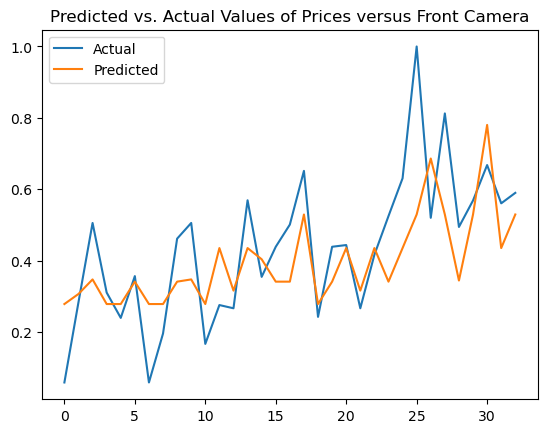

In [50]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Predicted vs. Actual Values of Prices versus Front Camera')
plt.show()

In [51]:
print(reg.intercept_, reg.coef_)

0.2782485215994186 [0.62739123]


# Linear regression model to predict the price of a mobile phone based on it's RAM value.

In [52]:
#Separating the target and feature variables
X = df1['ram'].values.reshape(-1,1)
y = df1['price']

In [53]:
#splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

In [54]:
#fitting the model
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [55]:
#predicting the model using test data
y_pred = reg.predict(X_test)

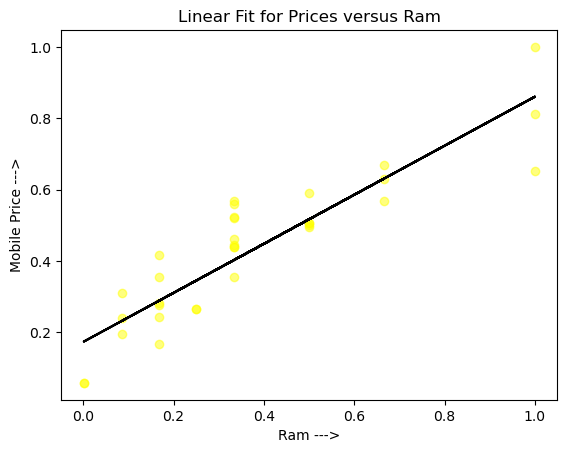

In [56]:
#scatterplot
plt.scatter(X_test,y_test, color = 'Yellow', alpha = 0.5)
plt.plot(X_test, y_pred, color = "Black")
plt.ylabel("Mobile Price --->")
plt.xlabel("Ram --->")
plt.title("Linear Fit for Prices versus Ram")
plt.show()

In [57]:
print("R-squared", reg.score(X_test,y_test),"\n",
     "MSE", mean_squared_error(y_test,y_pred, squared = True))

R-squared 0.8098651296704689 
 MSE 0.007677015895637978


# Graph showing Predicted vs Actual values

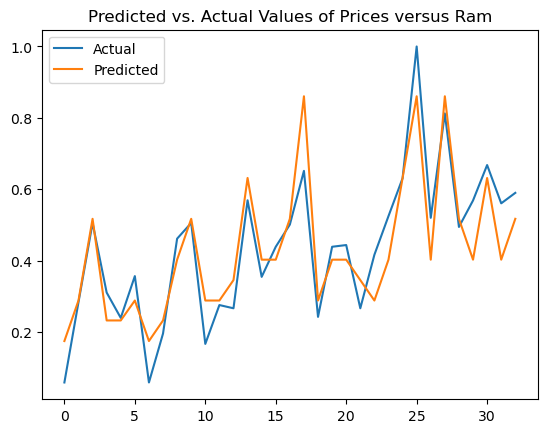

In [58]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Predicted vs. Actual Values of Prices versus Ram')
plt.show()

In [59]:
print(reg.intercept_, reg.coef_)

0.17364008398617536 [0.68682172]


# Linear regression model to predict the price of a mobile phone based on it's Battery capacity.

In [60]:
#Separating the target and feature variables
X = df1['battery'].values.reshape(-1,1)
y = df1['price']

In [61]:
#splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

In [62]:
#fitting the model
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [63]:
#predicting the model using test data
y_pred = reg.predict(X_test)

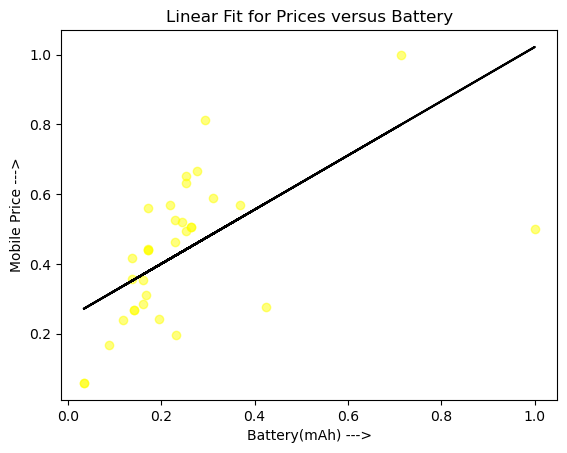

In [64]:
#scatterplot
plt.scatter(X_test,y_test, color = 'Yellow', alpha = 0.5)
plt.plot(X_test, y_pred, color = "Black")
plt.ylabel("Mobile Price --->")
plt.xlabel("Battery(mAh) --->")
plt.title("Linear Fit for Prices versus Battery")
plt.show()

In [65]:
print("R-squared", reg.score(X_test,y_test),"\n",
     "MSE", mean_squared_error(y_test,y_pred, squared = True))

R-squared 0.26498946957078795 
 MSE 0.029677289156832588


# Graph showing Predicted vs Actual values

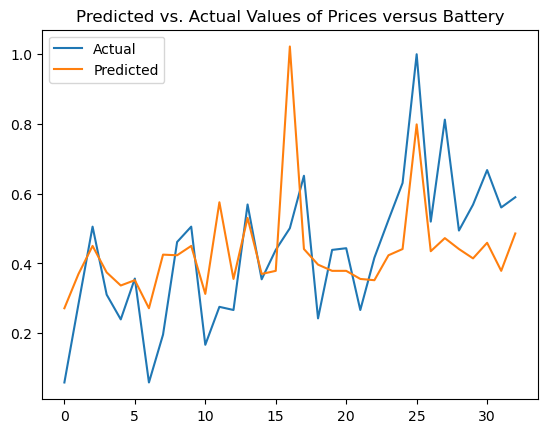

In [66]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Predicted vs. Actual Values of Prices versus Battery')
plt.show()

In [67]:
print(reg.intercept_, reg.coef_)

0.24456990952209023 [0.77767209]


# Linear regression model to predict the price of a mobile phone based on it's Weight value.

In [68]:
#Separating the target and feature variables
X = df1['weight'].values.reshape(-1,1)
y = df1['price']

In [69]:
#splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

In [70]:
#splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

In [71]:
#fitting the model
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [72]:
#predicting the model using test data
y_pred = reg.predict(X_test)

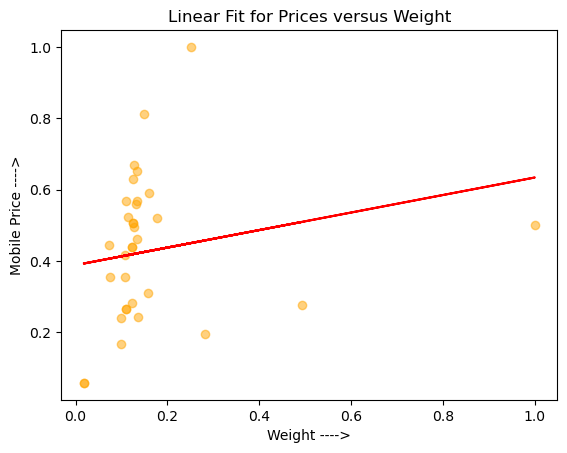

In [73]:
#scatterplot
plt.scatter(X_test,y_test, color = 'Orange', alpha = 0.5)
plt.plot(X_test, y_pred, color = "Red")
plt.ylabel("Mobile Price ---->")
plt.xlabel("Weight ---->")
plt.title("Linear Fit for Prices versus Weight")
plt.show()

In [74]:
print("R-squared", reg.score(X_test,y_test),"\n",
     "MSE", mean_squared_error(y_test,y_pred, squared = True))

R-squared 0.011741480279758632 
 MSE 0.03990260361890906


# Graph showing Predicted vs Actual values

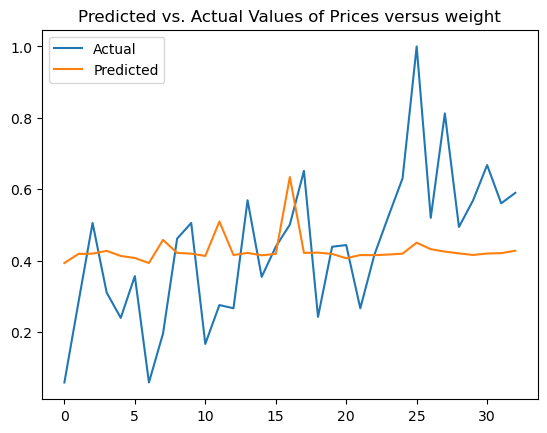

In [75]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Predicted vs. Actual Values of Prices versus weight')
plt.show()

In [76]:
print(reg.intercept_, reg.coef_)

0.3887272238189543 [0.24538264]


# Linear regression model to predict the price of a mobile phone based on it's Resolution value.

In [77]:
#Separating the target and feature variables
X = df1['resoloution'].values.reshape(-1,1)
y = df1['price']

In [78]:
#splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

In [79]:
#splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

In [80]:
#fitting the model
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [81]:
#predicting the model using test data
y_pred = reg.predict(X_test)

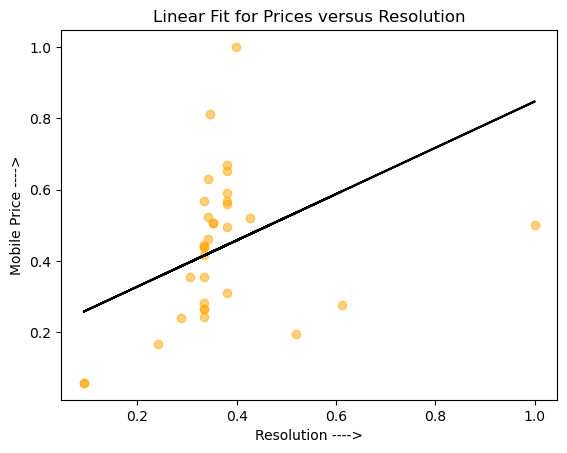

In [82]:
#scatterplot
plt.scatter(X_test,y_test, color = 'Orange', alpha = 0.5)
plt.plot(X_test, y_pred, color = "Black")
plt.ylabel("Mobile Price ---->")
plt.xlabel("Resolution ---->")
plt.title("Linear Fit for Prices versus Resolution")
plt.show()

In [83]:
print("R-squared", reg.score(X_test,y_test),"\n",
     "MSE", mean_squared_error(y_test,y_pred, squared = True))

R-squared 0.042825670626708945 
 MSE 0.03864752703572898


In [84]:
print(reg.intercept_, reg.coef_)

0.1984964049316788 [0.64878834]


In [85]:
df1.columns.values

array(['price', 'sale', 'weight', 'resoloution', 'ppi', 'cpu_core',
       'cpu_freq', 'internal_mem', 'ram', 'rearcam', 'front_cam',
       'battery', 'thickness'], dtype=object)

# Multi-Linear regression model to predict the price of a mobile phone based on it's Specifications.

In [86]:
#separating the feature from the target
X = df1.drop('price', axis=1)
y = df1['price']

In [87]:
#spliting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [88]:
#fitting the model
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [89]:
#testing the model on the test data
y_pred = reg.predict(X_test)

In [90]:
#the coefficients of the model for ease of interpretation
print(reg.intercept_,reg.coef_,reg)

0.21553208096148835 [-4.91969148e-06 -1.04733869e-01 -1.78795158e-01  2.02825128e-01
  1.07097100e-01  9.54749158e-02  1.91772667e-01  1.62790588e-01
  2.27423626e-02  3.83633731e-02  2.87103990e-01 -2.48789910e-01] LinearRegression()


In [91]:
print( "MSE", mean_squared_error(y_test,y_pred,squared = True))

MSE 0.0015584385809564421


In [92]:
r2_multireg = r2_score(y_test, y_pred)
print('R2 score:', r2_multireg)

R2 score: 0.9614025134850829


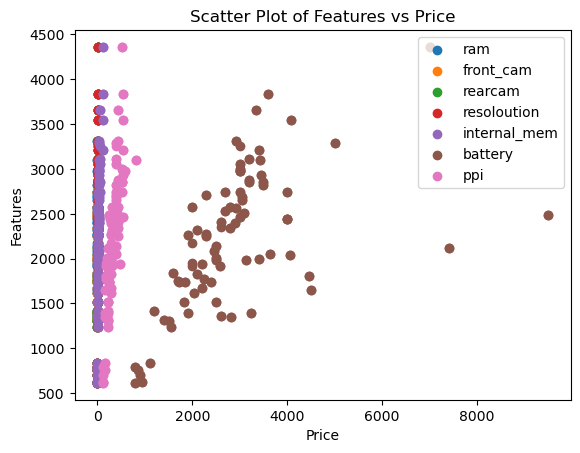

In [93]:
features = ["ram", "front_cam", "rearcam","resoloution","internal_mem","battery","ppi"]
target = "price"

# Create a scatter plot of the features against the target variable
for feature in features:
    plt.scatter(df[feature], df[target], label=feature)

# Add labels and title to the plot
plt.xlabel("Price")
plt.ylabel("Features")
plt.title("Scatter Plot of Features vs Price")

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

# Graph showing Predicted vs Actual values

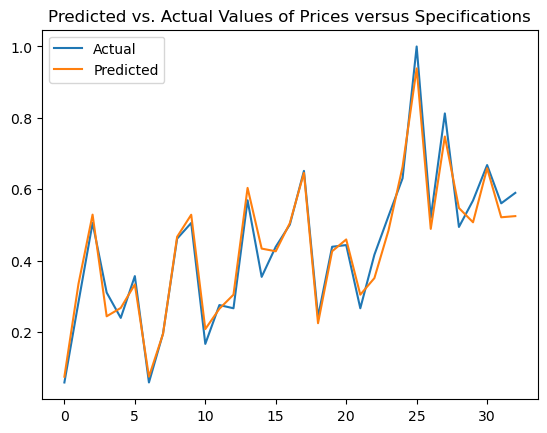

In [94]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Predicted vs. Actual Values of Prices versus Specifications')
plt.show()

# Polynomial regression model to predict the price of a mobile phone based on it's Specifications.

In [95]:
#separating the feature from the target
X = df1.drop('price', axis=1)
y = df1['price']
X=np.array(X)
X.shape
y=np.array(y)
y=y.reshape(-1,1)
y.shape


(161, 1)

In [96]:
# Create polynomial features up to degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [97]:
# Fit a linear regression model using the polynomial features
model = LinearRegression().fit(X_poly, y)
model1= LinearRegression().fit(X, y)

In [98]:
model.score(X_poly,y)

0.9995308819613963

In [99]:
r2_polyreg = r2_score(y_test, y_pred)
print('R2 score:', r2_polyreg)

R2 score: 0.9614025134850829


# Graph showing Predicted vs Actual values

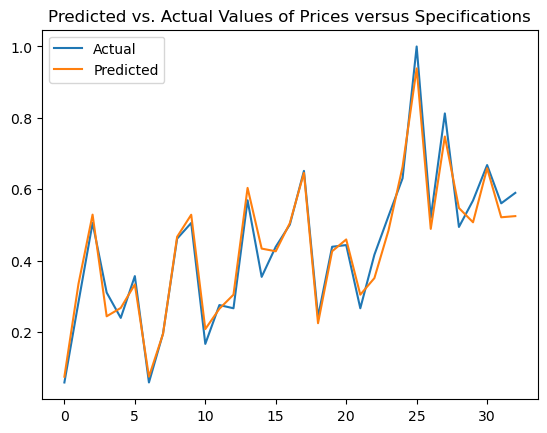

In [100]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Predicted vs. Actual Values of Prices versus Specifications')
plt.show()

In [101]:
model.intercept_
model.coef_

array([[-4.80766998e+04,  4.38625580e-05,  7.95918001e+01,
        -6.28194891e+01,  2.60352345e+00, -4.05325904e+00,
         1.06070648e+00,  4.96109171e+00, -8.70563119e+00,
         1.21139364e+01, -6.23413755e+00, -7.06790851e+00,
        -2.26326718e+01,  5.60962121e-09, -5.68353625e-04,
         3.04219575e-04, -5.91377147e-05,  8.43722922e-05,
        -1.96300073e-04,  1.07098747e-04, -1.77744770e-04,
        -3.26845234e-05, -2.38786937e-05,  3.77450027e-04,
        -1.89596296e-04,  2.27405208e+02, -3.21603403e+02,
        -4.76671717e+01,  5.39165366e+00,  2.94426327e+01,
         6.72879711e+01,  3.13033196e+00,  4.64068214e+01,
        -3.58298146e+01, -1.53321639e+02, -9.18024250e+01,
         1.12860749e+02,  4.43263223e+00,  3.08548987e+00,
        -3.25592727e+00, -4.60602198e+01,  3.93261164e+01,
        -4.54592499e+01,  2.19290387e+01,  6.87170197e+01,
         7.48058967e+01,  2.28717520e+00, -3.58051846e-01,
        -4.76316404e-01,  1.65886248e+01, -5.60032943e+0

In [102]:
result=model.predict(X_poly)
result


array([[ 4.66032507e-01],
       [ 3.05474548e-01],
       [ 3.48363734e-01],
       [ 1.88597747e-01],
       [ 3.05400243e-01],
       [ 4.05434451e-01],
       [ 1.67034309e-01],
       [ 4.05308596e-01],
       [ 1.88348662e-01],
       [ 5.29486990e-01],
       [ 4.83932918e-01],
       [ 3.72058427e-01],
       [ 4.16482842e-01],
       [ 5.74396931e-01],
       [ 5.29376809e-01],
       [ 2.63255721e-01],
       [ 4.36101491e-01],
       [ 6.21037000e-01],
       [ 2.63170428e-01],
       [ 1.66326909e-01],
       [ 4.84026184e-01],
       [ 4.66904250e-01],
       [ 6.26535110e-01],
       [ 5.73312301e-01],
       [ 3.45401078e-01],
       [ 2.07744471e-01],
       [ 3.72405284e-01],
       [ 6.20398232e-01],
       [ 2.07729810e-01],
       [ 3.54930959e-01],
       [ 4.34772942e-01],
       [ 6.26119428e-01],
       [ 7.20746489e-01],
       [ 5.44774956e-01],
       [ 2.18772926e-01],
       [ 5.44912826e-01],
       [ 3.43863137e-01],
       [ 4.01805018e-01],
       [ 3.0

In [103]:
#plt.plot(X,result)
##plt.scatter(X,y)

# KNeighbor regression model to predict the price of a mobile phone based on it's Specifications.

In [104]:

# separate the features and target variable
X = df1.drop('price', axis=1)
y = df1['price']

In [105]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [106]:
# create a KNeighborsRegressor object
knn = KNeighborsRegressor(n_neighbors=5)

In [107]:
# fit the model to the training data
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [108]:
# make predictions on the test data
y_pred = knn.predict(X_test)


In [109]:
# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 0.04604373599440726


In [110]:
r2_knn = r2_score(y_test, y_pred)
print('R2 score:', r2_knn)

R2 score: -0.26870562949548416


# Graph showing Predicted vs Actual values

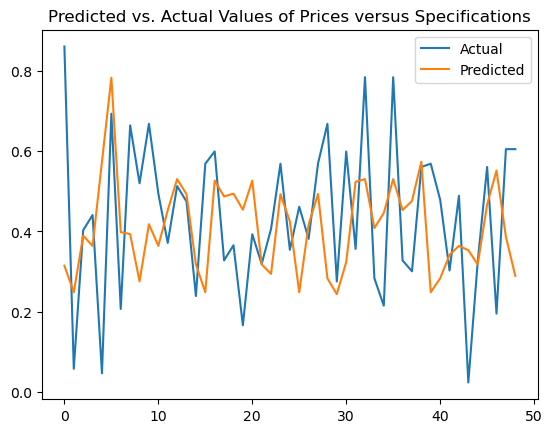

In [111]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Predicted vs. Actual Values of Prices versus Specifications')
plt.show()

# DecisionTree regression model to predict the price of a mobile phone based on it's Specifications

In [112]:


# separate the features and target variable
X = df1.drop('price', axis=1)
y = df1['price']

In [113]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [114]:
# create a DecisionTreeRegressor object
dtr = DecisionTreeRegressor(max_depth=3)

In [115]:
# fit the model to the training data
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [116]:
# make predictions on the test data
y_pred = dtr.predict(X_test)

In [117]:
# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 0.007905598051320689


In [118]:
# calculate the R2 score
r2_decision = r2_score(y_test, y_pred)
print('R2 score:', r2_decision)

R2 score: 0.7745925166195197


# Graph showing Predicted vs Actual values

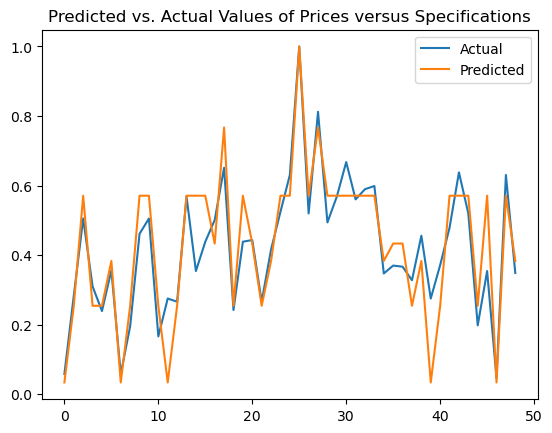

In [119]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Predicted vs. Actual Values of Prices versus Specifications')
plt.show()

# Graph comparing the R2 score of different model used to predict mobile phone price based on it's specification.

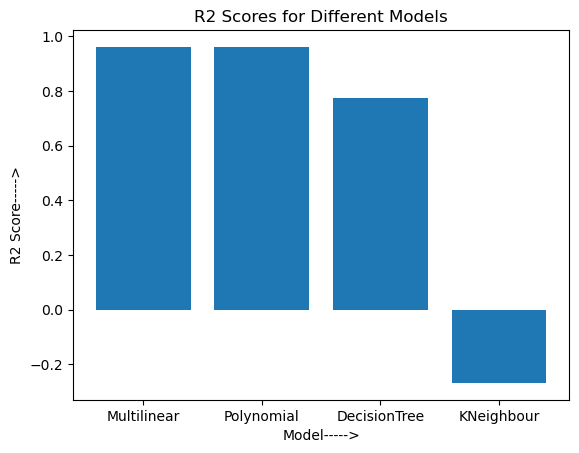

In [120]:
models = ['Multilinear','Polynomial', 'DecisionTree', 'KNeighbour']
r2_scores = [r2_multireg, r2_polyreg, r2_decision,r2_knn]

plt.bar(models, r2_scores)
plt.title('R2 Scores for Different Models')
plt.xlabel('Model----->')
plt.ylabel('R2 Score----->')
plt.show()